## Exploratory Data Analysis

Loading all the data we have and merging it into one DataFrame for further analysis.

In [112]:
import pandas as pd

In [113]:
import pandas as pd
import os
from functools import reduce

def read_and_merge_all_data(data_dir="data/out/"):
    """
    Read all CSV files from data/out/ directory and merge them on YEAR and COUNTRYCODE
    """
    # Get all CSV files in the directory
    csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
    print(csv_files)
    
    if not csv_files:
        print(f"No CSV files found in {data_dir}")
        return pd.DataFrame()
    
    dataframes = []
    
    for file in csv_files:
        file_path = os.path.join(data_dir, file)
        try:
            df = pd.read_csv(file_path)
            print(f"Loaded {file}: {df.shape}")
            
            # Check if the required columns exist
            if 'YEAR' in df.columns and 'COUNTRYCODE' in df.columns:
                dataframes.append(df)
            else:
                print(f"Warning: {file} doesn't have YEAR and COUNTRYCODE columns, skipping...")
                
        except Exception as e:
            print(f"Error reading {file}: {e}")
    
    if not dataframes:
        print("No valid dataframes to merge")
        return pd.DataFrame()
    
    # Merge all dataframes
    print("Merging all dataframes...")
    merged_df = reduce(lambda left, right: pd.merge(left, right, on=['YEAR', 'COUNTRYCODE'], how='outer'), dataframes)
    
    print(f"Final merged dataframe shape: {merged_df.shape}")
    return merged_df

# Use the function
SELECTED_COUNTRIES = ["USA", "GBR", "CHN"] #, "RUS", "CHN", "IND", "DEU", "FRA", "JPN", "CHE", "ARG"]

merged_df = read_and_merge_all_data()
merged_df

['owd_exported_goods_as_share_of_gdp.csv', 'owd_armed_forces_percent_population.csv', 'all_clio_data_pt2.csv', 'owd_education_government_expenditure_gdp.csv', 'nobel_laureates.csv', 'owd_education_tertiary_completion_rate.csv', 'owd_military-spending.csv', 'wipo_patents.csv', 'all_clio_data.csv', 'owd_military_spending_as_share_of_gdp.csv', 'owd-armed-forces-personnel.csv', 'owd_exported_goods_gdp_share.csv']
Loaded owd_exported_goods_as_share_of_gdp.csv: (13808, 3)
Loaded owd_armed_forces_percent_population.csv: (5602, 3)
Loaded all_clio_data_pt2.csv: (41657, 16)
Loaded owd_education_government_expenditure_gdp.csv: (5381, 3)
Loaded nobel_laureates.csv: (647, 3)
Loaded owd_education_tertiary_completion_rate.csv: (4311, 3)
Loaded owd_military-spending.csv: (15547, 3)
Loaded wipo_patents.csv: (3979, 4)
Loaded all_clio_data.csv: (98757, 42)
Loaded owd_military_spending_as_share_of_gdp.csv: (8366, 3)
Loaded owd-armed-forces-personnel.csv: (5824, 3)
Loaded owd_exported_goods_gdp_share.csv: 

COUNTRYCODE  YEAR  MERCHANDISEEXPORTSGDP  ARMEDFORCESPERCOFPOP  \
0              AFG  1500                    NaN                   NaN   
1              AGO  1500                    NaN                   NaN   
2              ALB  1500                    NaN                   NaN   
3              AND  1500                    NaN                   NaN   
4              ARE  1500                    NaN                   NaN   
...            ...   ...                    ...                   ...   
104298         VNM  2040                    NaN                   NaN   
104299         YEM  2040                    NaN                   NaN   
104300         ZAF  2040                    NaN                   NaN   
104301         ZMB  2040                    NaN                   NaN   
104302         ZWE  2040                    NaN                   NaN   

        AluminiumProduction  BauxiteProduction  CopperProduction  \
0                       NaN                NaN               NaN   
1                       NaN                NaN               NaN   
2                       NaN                NaN               NaN   
3                       NaN                NaN               NaN   
4                       NaN                NaN               NaN   
...                     ...                ...               ...   
104298                  NaN                NaN               NaN   
104299                  NaN                NaN               NaN   
104300                  NaN                NaN               NaN   
104301                  NaN                NaN               NaN   
104302                  NaN                NaN               NaN   

        GoldProduction  HeightGini  Height  ...  UNIVERSITIESFOUNDED  \
0                  NaN         NaN     NaN  ...                  NaN   
1                  NaN         NaN     NaN  ...                  NaN   
2                  NaN         NaN     NaN  ...                  NaN   
3                  NaN         NaN     NaN  ...                  NaN   
4                  NaN         NaN     NaN  ...                  NaN   
...                ...         ...     ...  ...                  ...   
104298             NaN         NaN     NaN  ...                  NaN   
104299             NaN         NaN     NaN  ...                  NaN   
104300             NaN         NaN     NaN  ...                  NaN   
104301             NaN         NaN     NaN  ...                  NaN   
104302             NaN         NaN     NaN  ...                  NaN   

        URBANIZATIONRATIO  WEALTHDECADALGINIS  WEALTHTOP10PERCENTSHARE  \
0                  0.0885                 NaN                      NaN   
1                     NaN                 NaN                      NaN   
2                  0.2450                 NaN                      NaN   
3                     NaN                 NaN                      NaN   
4                     NaN                 NaN                      NaN   
...                   ...                 ...                      ...   
104298                NaN                 NaN                      NaN   
104299                NaN                 NaN                      NaN   
104300                NaN                 NaN                      NaN   
104301                NaN                 NaN                      NaN   
104302                NaN                 NaN                      NaN   

        WEALTHTOTAL  WEALTHYEARLYGINIS  WORKINGWEEKINMANUFACTURING  \
0               NaN                NaN                         NaN   
1               NaN                NaN                         NaN   
2               NaN                NaN                         NaN   
3               NaN                NaN                         NaN   
4               NaN                NaN                         NaN   
...             ...                ...                         ...   
104298          NaN                NaN                         NaN   

In [114]:
# SELECTED_COUNTRIES = ["USA", "GBR", "CHN"] #, "RUS", "CHN", "IND", "DEU", "FRA", "JPN", "CHE", "ARG"]

# df_tertiary = pd.read_csv("data/out/owd_education_tertiary_completion_rate.csv")
# df_gpd_edu = pd.read_csv("data/out/owd_education_government_expenditure_gdp.csv")
# df_nobel = pd.read_csv("data/out/nobel_laureates.csv")
# df_patents = pd.read_csv("data/out/wipo_patents.csv")
# df_clio = pd.read_csv("data/out/all_clio_data.csv")


# # df_clio = df_clio.loc[:, ~df_clio.columns.str.contains('^Unnamed')]

# merged_df = pd.merge(df_tertiary, df_gpd_edu, on=["YEAR", "COUNTRYCODE"], how="outer")
# merged_df = pd.merge(merged_df, df_nobel, on=["YEAR", "COUNTRYCODE"], how="outer")
# merged_df = pd.merge(merged_df, df_patents, on=["YEAR", "COUNTRYCODE"], how="outer")
# merged_df = pd.merge(merged_df, df_clio, on=["YEAR", "COUNTRYCODE"], how="outer")


# # merged_df.fillna(0, inplace=True)
# merged_df


# # duplicates = merged_df.groupby(['YEAR', 'COUNTRYCODE']).size().reset_index(name='count')
# # duplicates = duplicates[duplicates['count'] > 1]
# # print(duplicates)

# # merged_df[(merged_df['YEAR'] == 1884) & (merged_df['COUNTRYCODE'] == 'BEL')]



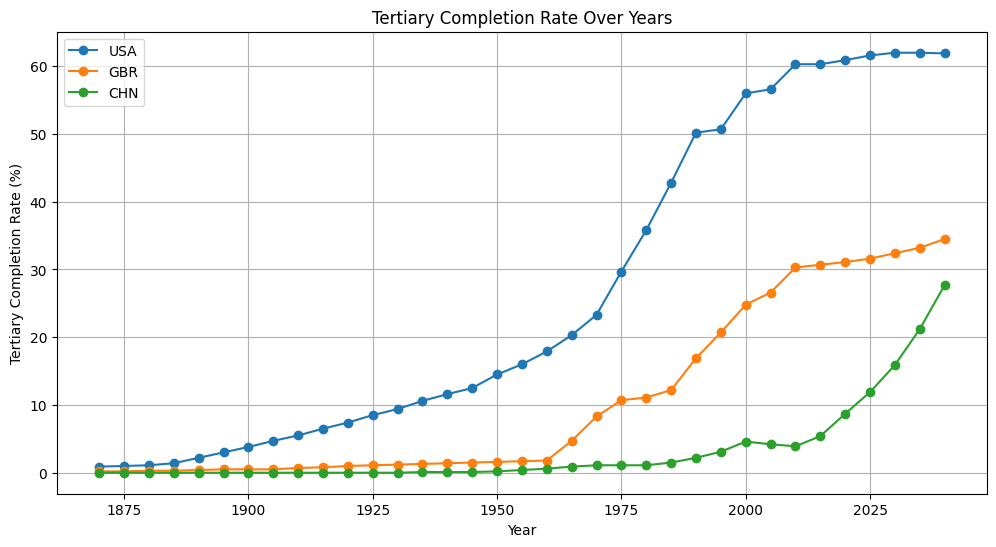

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for country in SELECTED_COUNTRIES:
    country_data = df_tertiary[df_tertiary['COUNTRYCODE'] == country]
    plt.plot(country_data['YEAR'], country_data['TERTIARYCOMPLETIONRATE'], label=country, marker='o')

plt.title('Tertiary Completion Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Tertiary Completion Rate (%)')
plt.legend()
plt.grid()
plt.show()


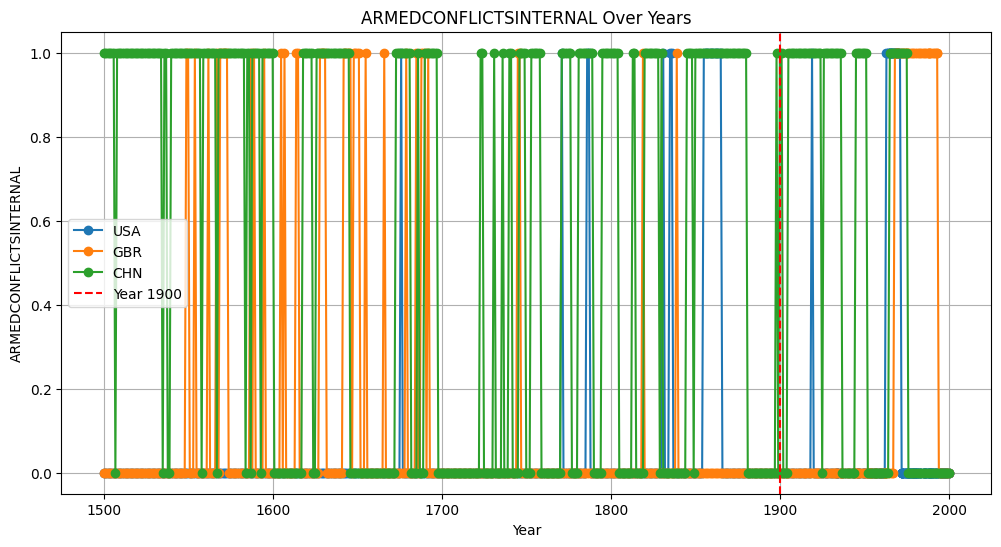

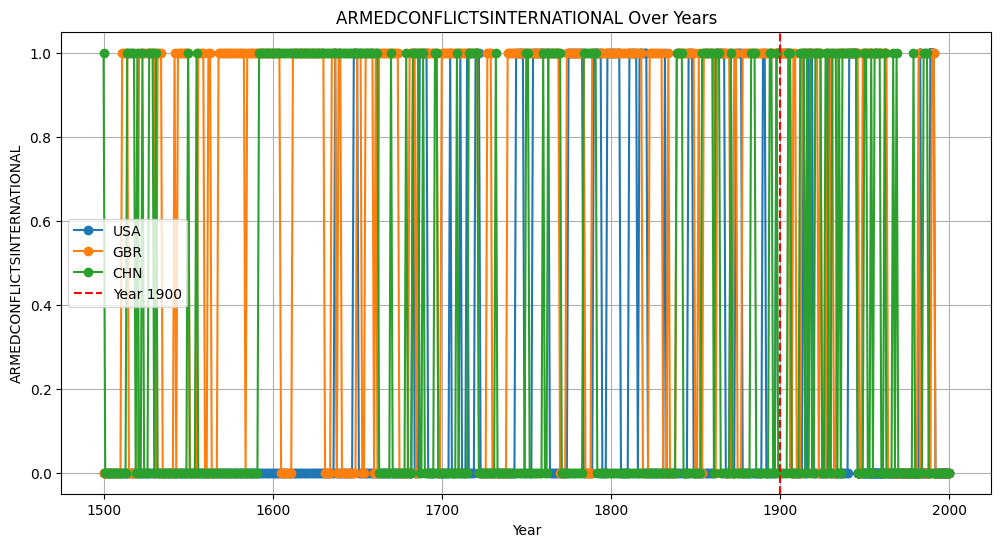

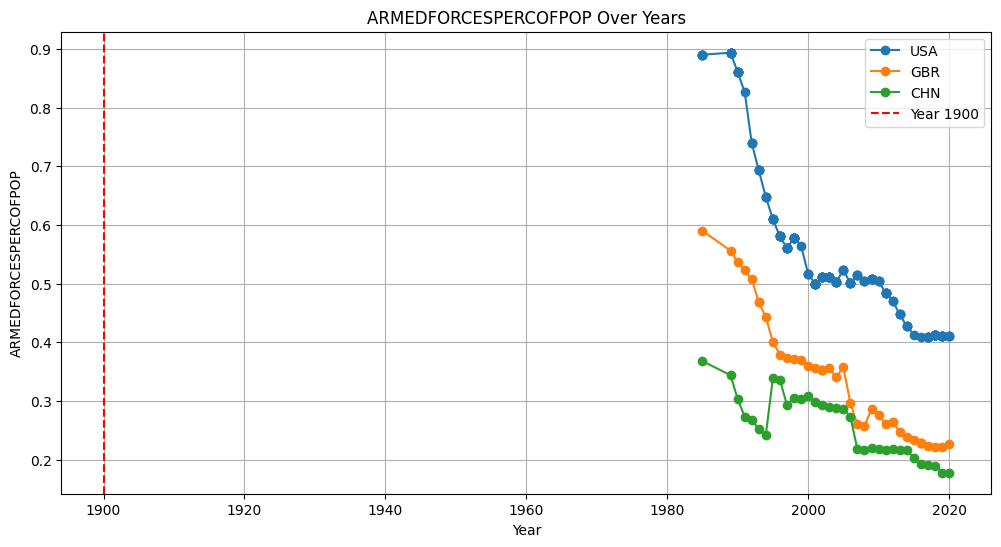

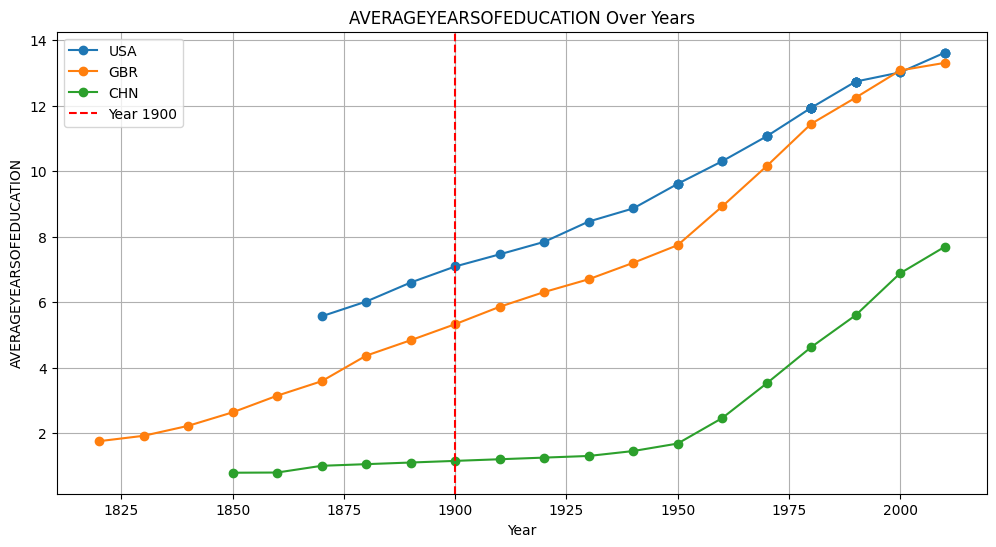

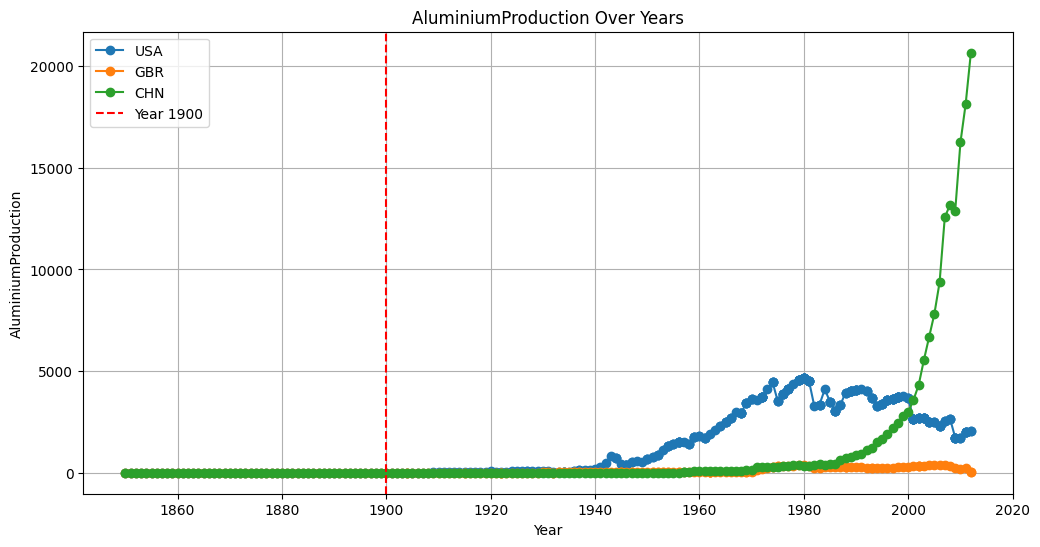

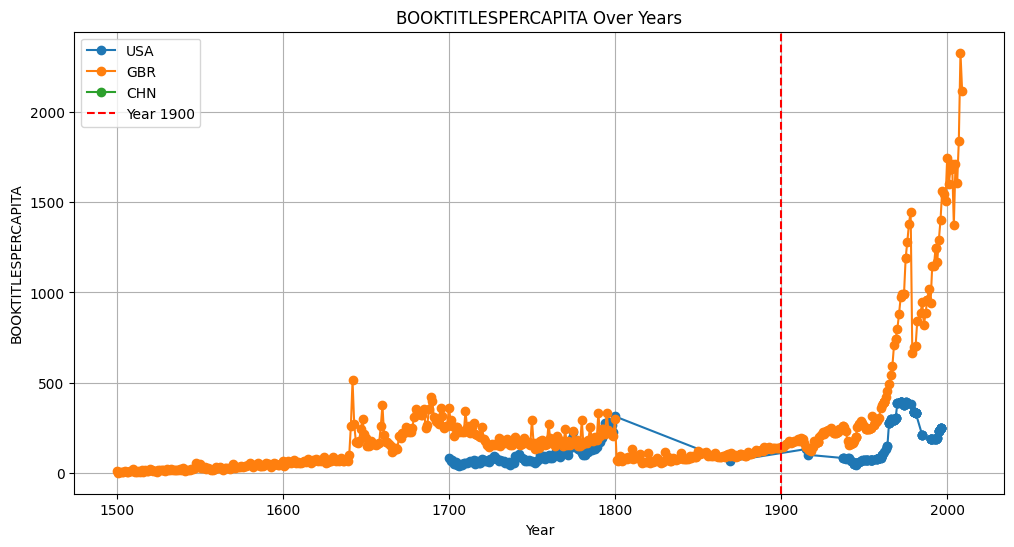

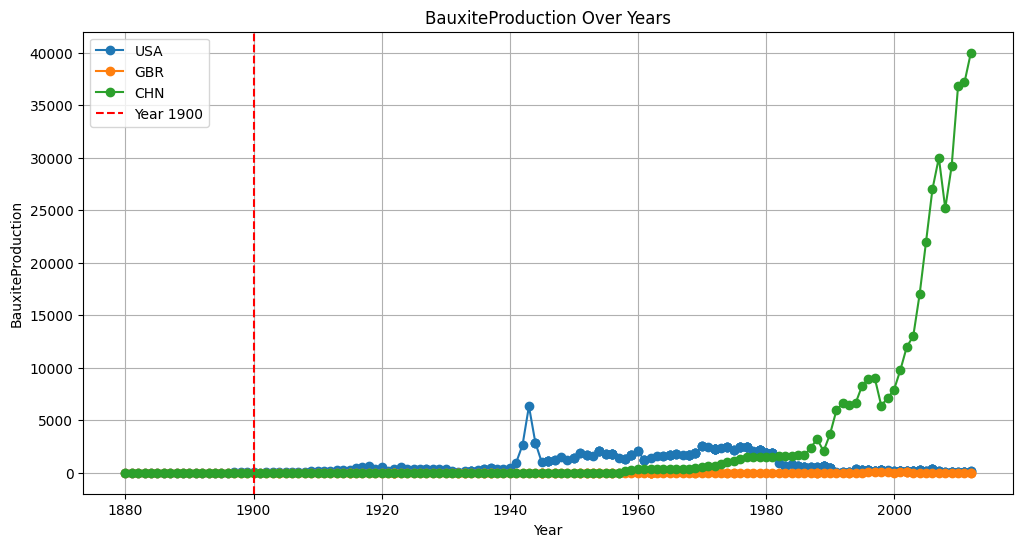

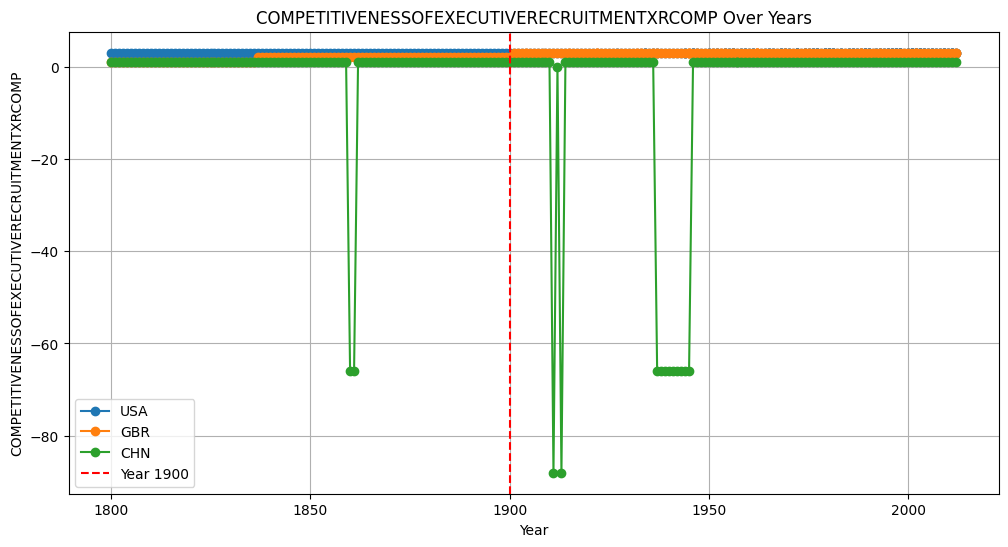

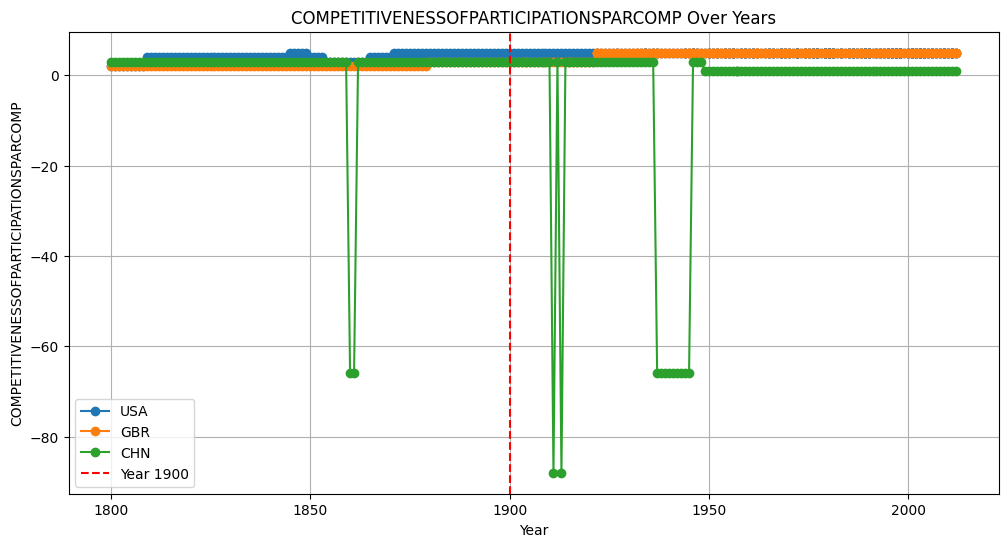

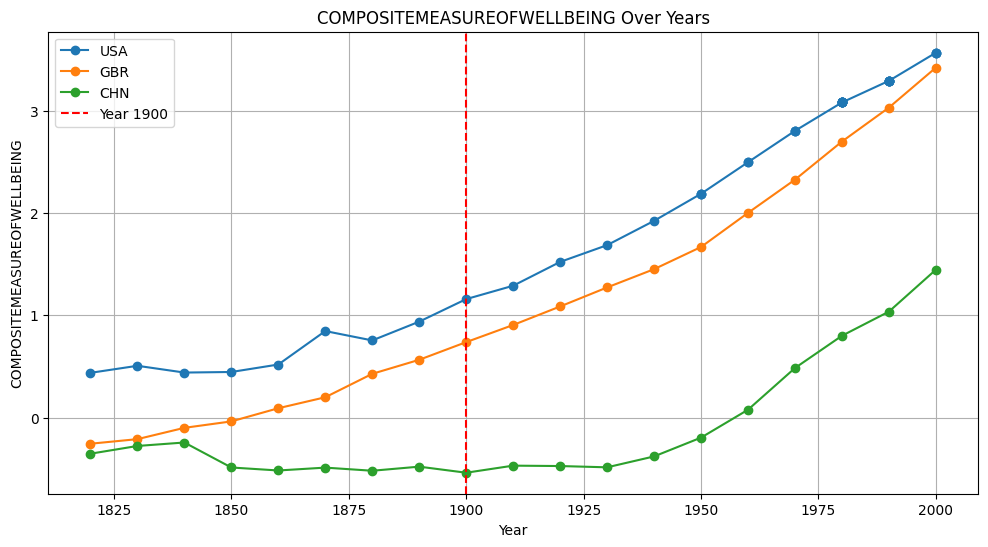

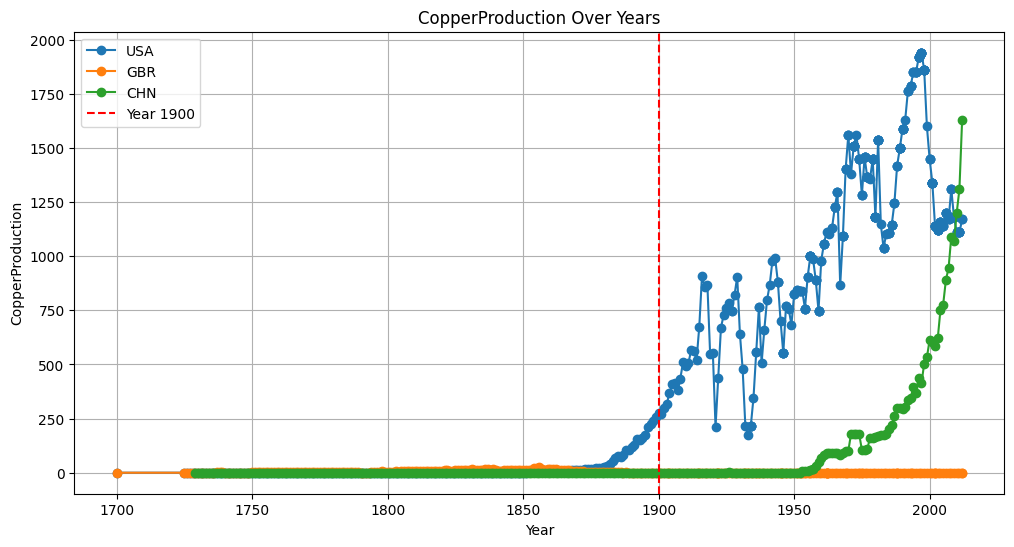

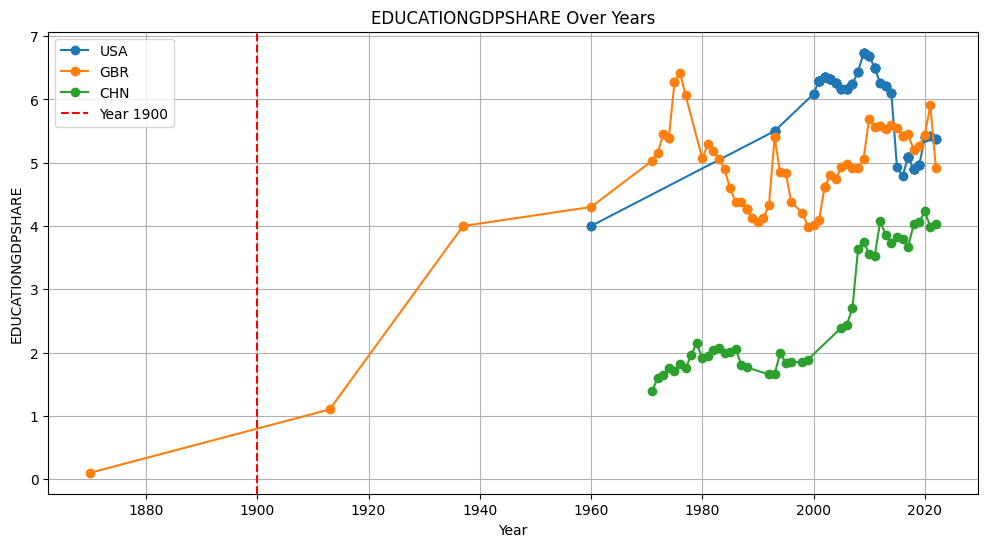

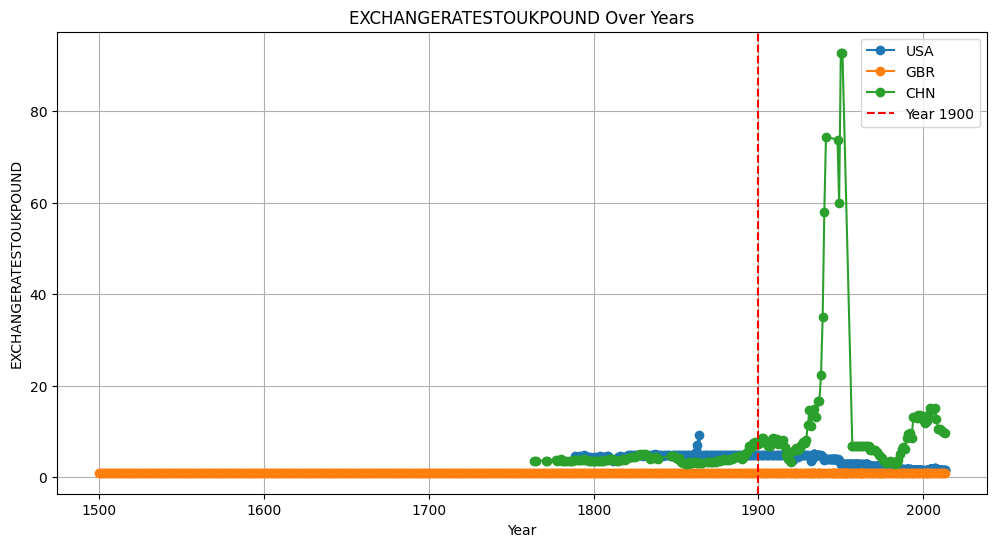

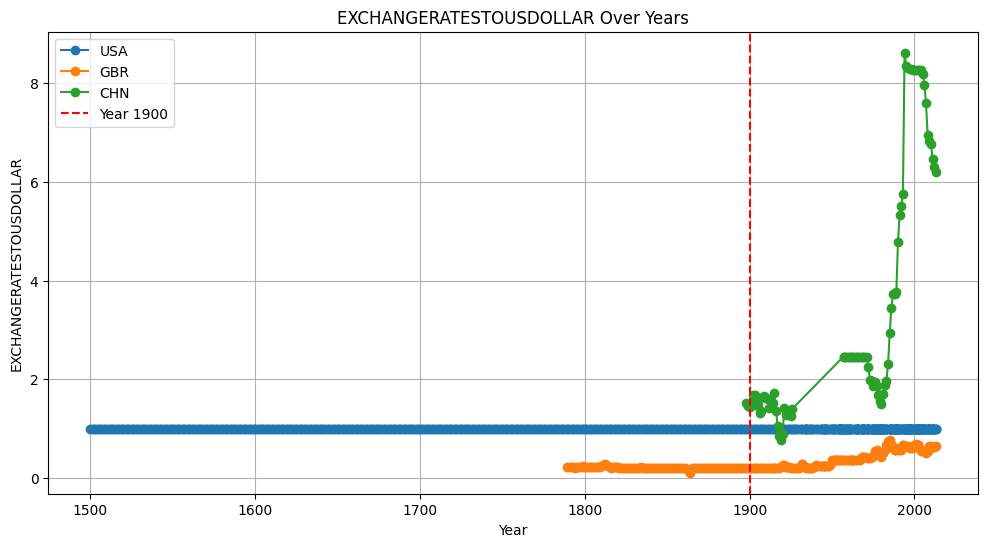

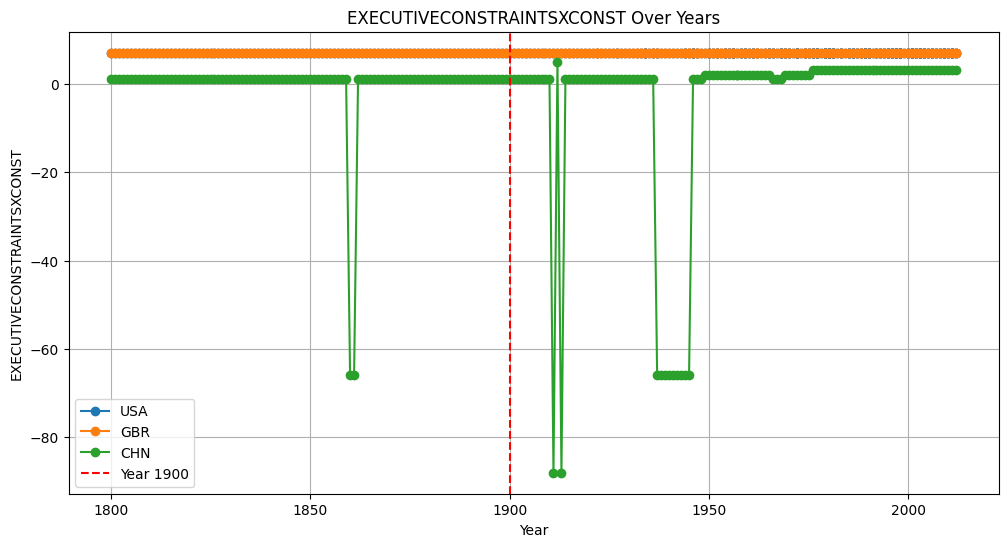

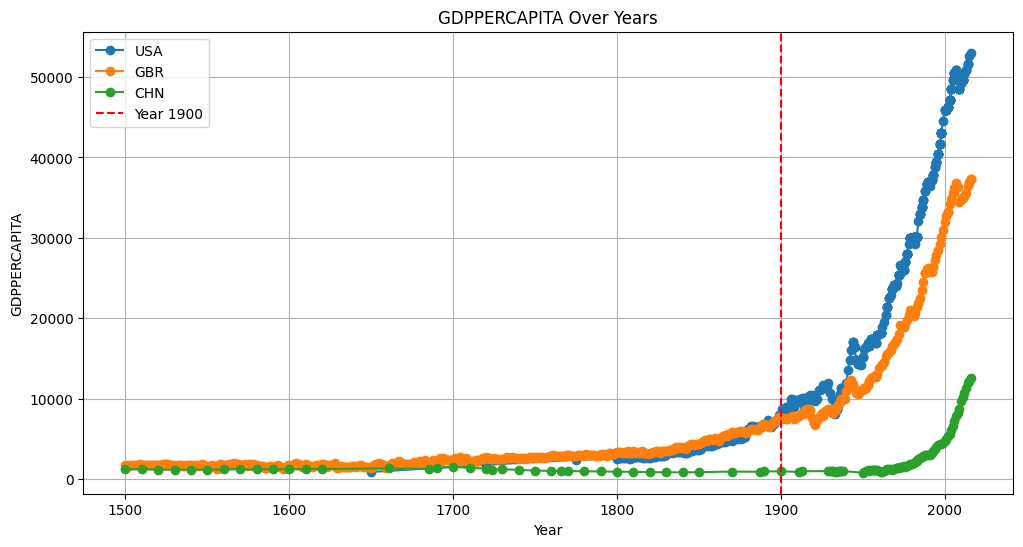

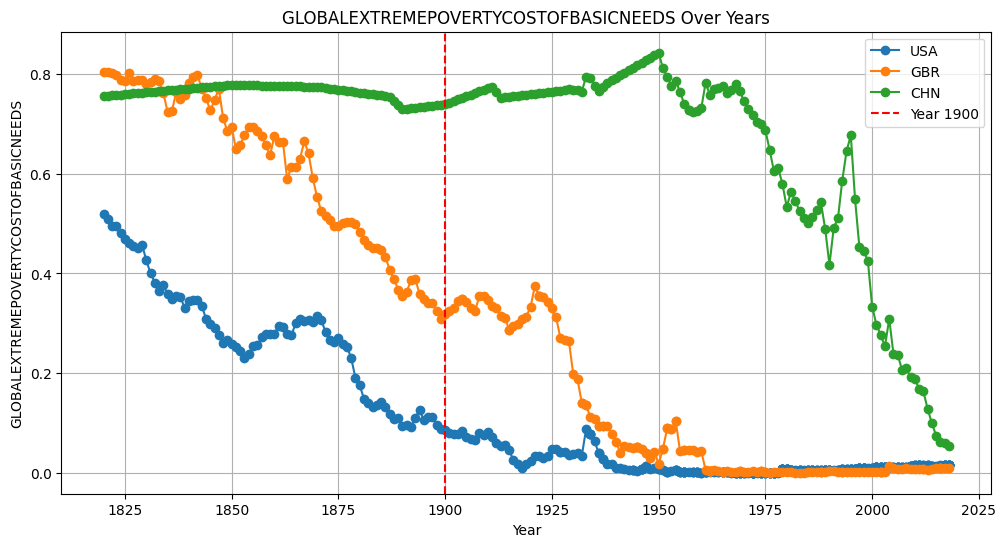

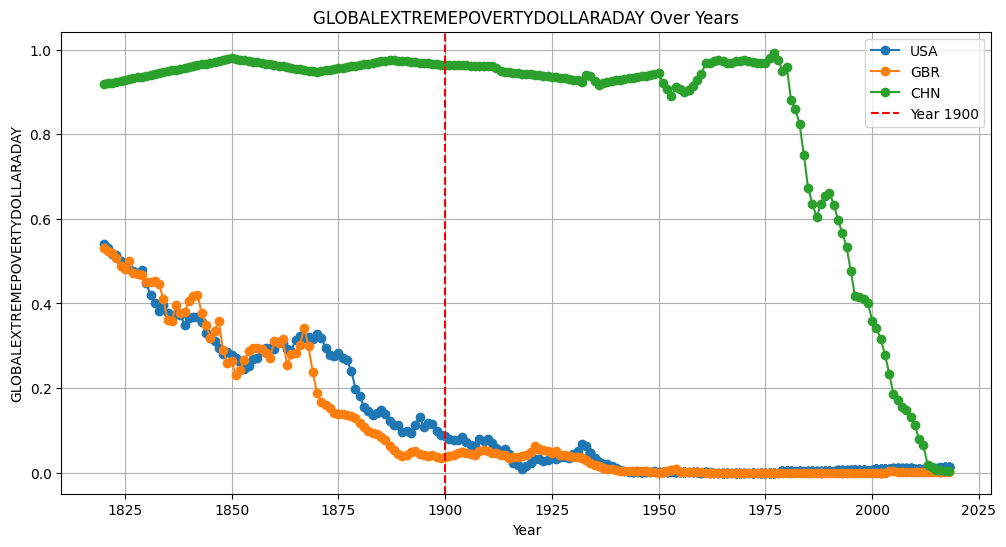

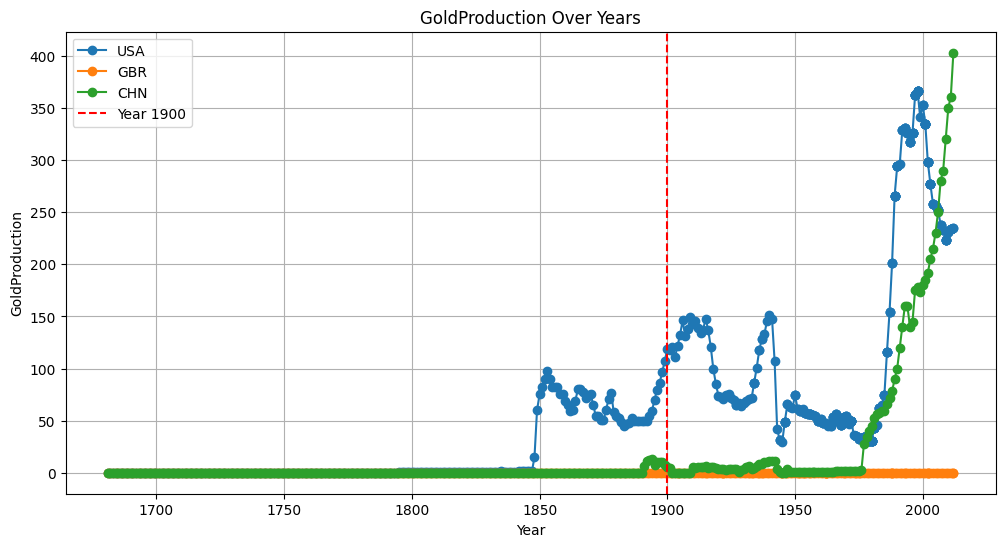

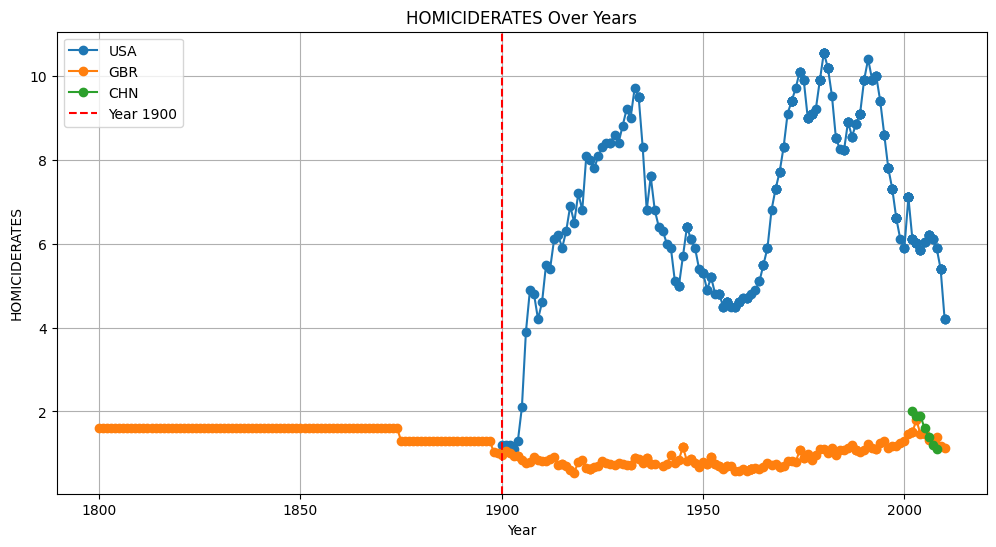

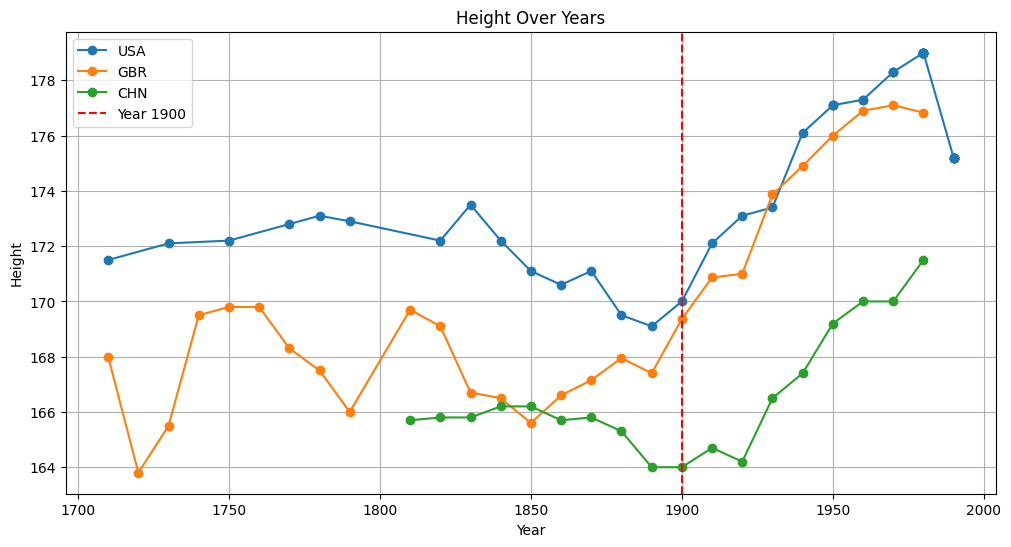

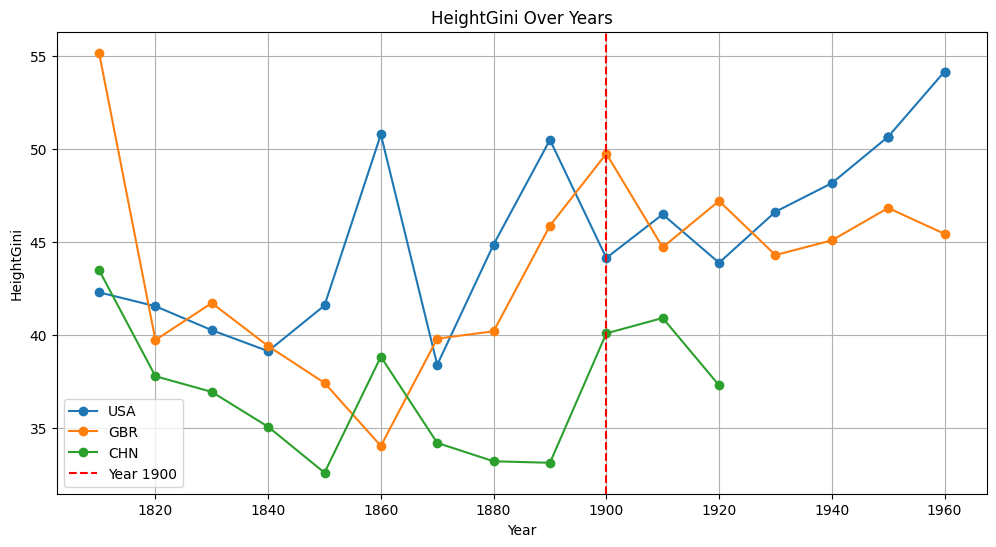

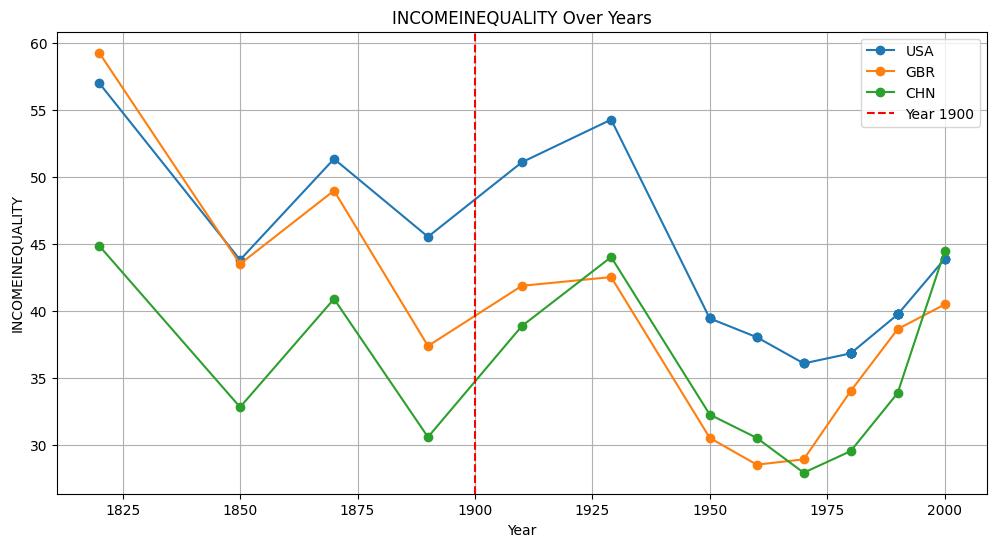

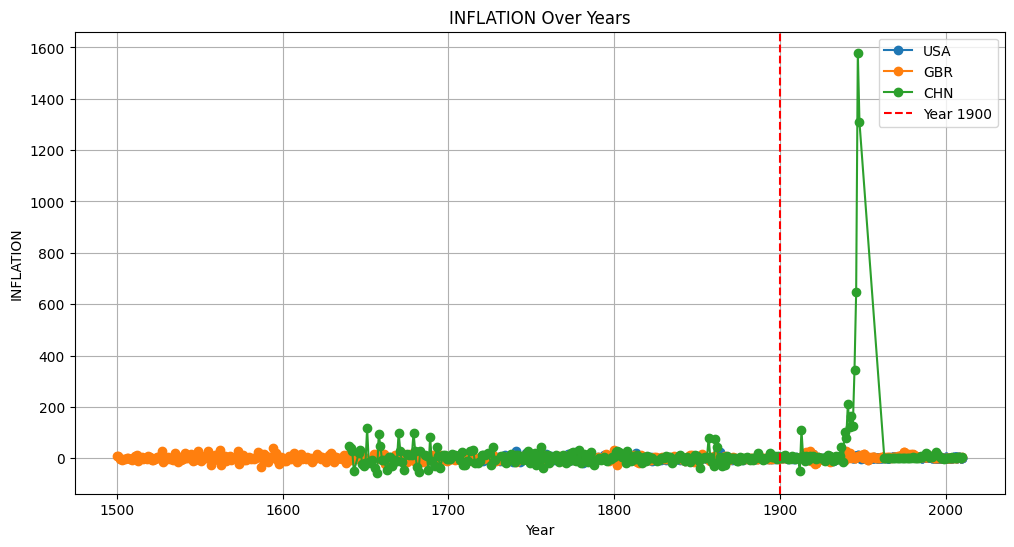

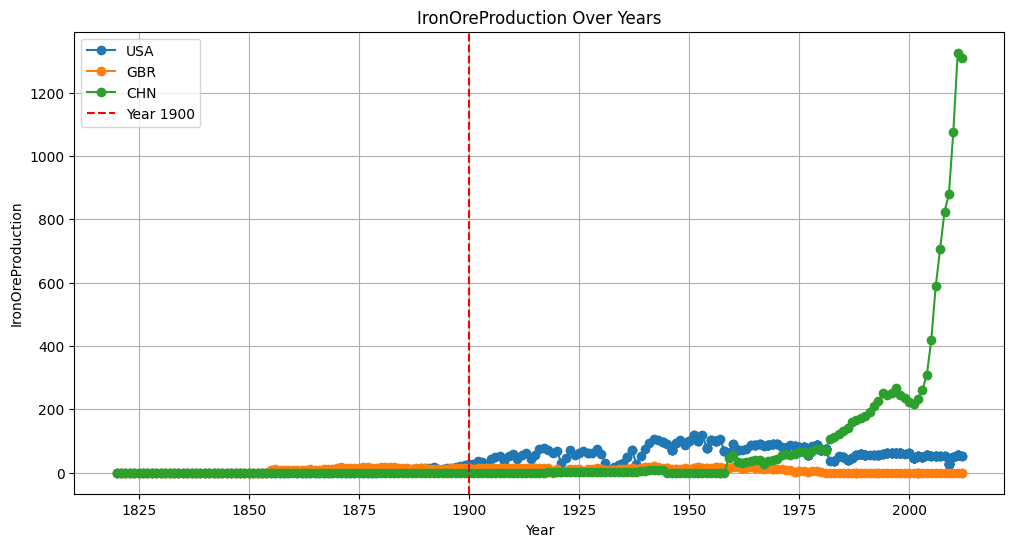

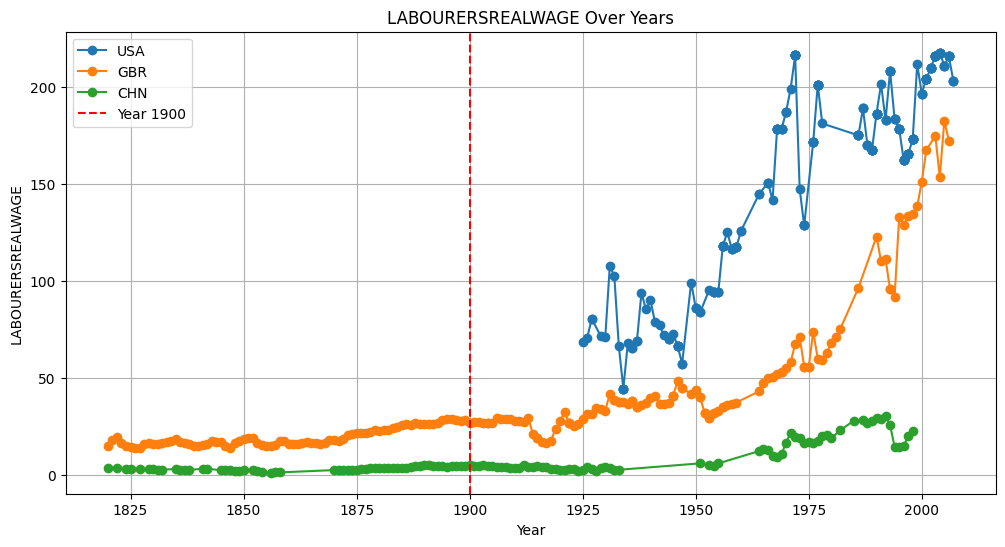

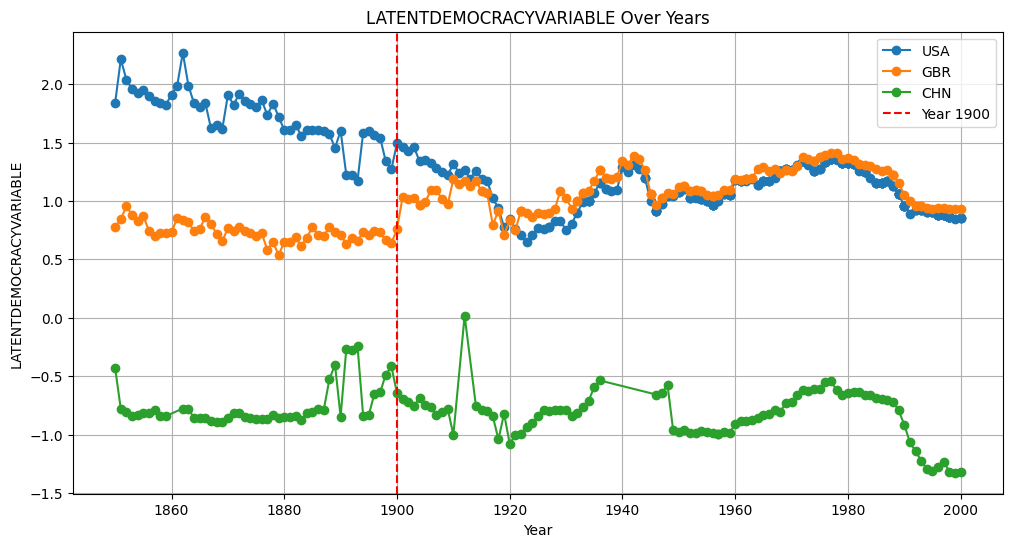

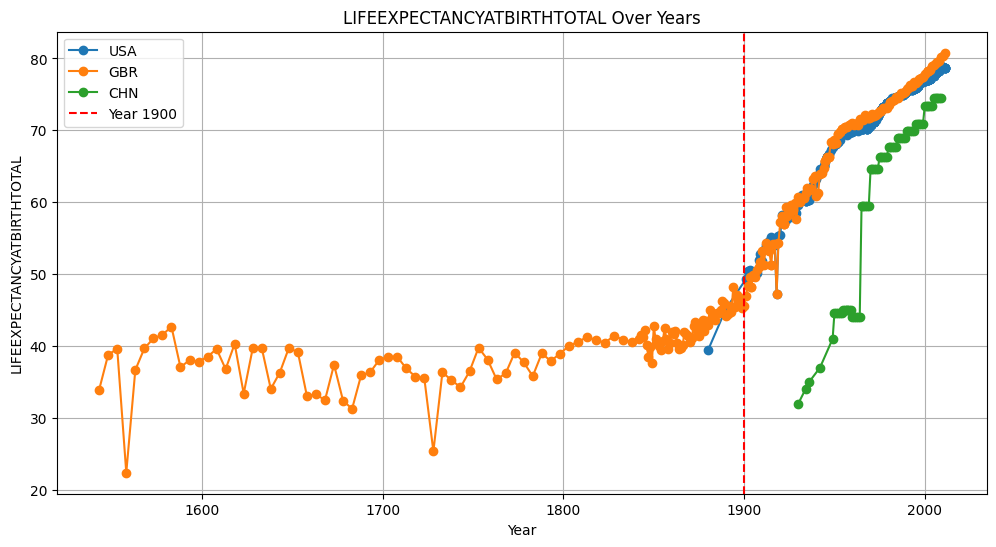

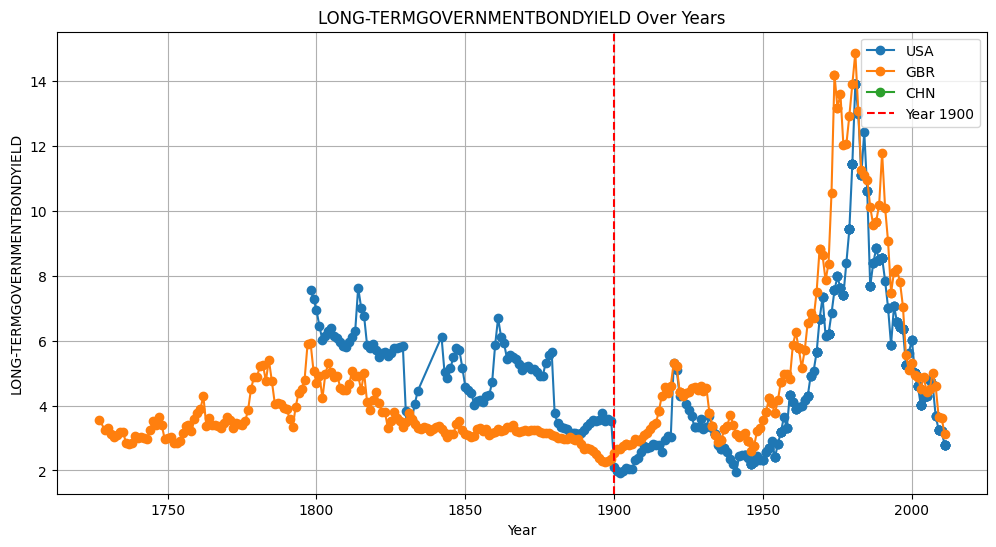

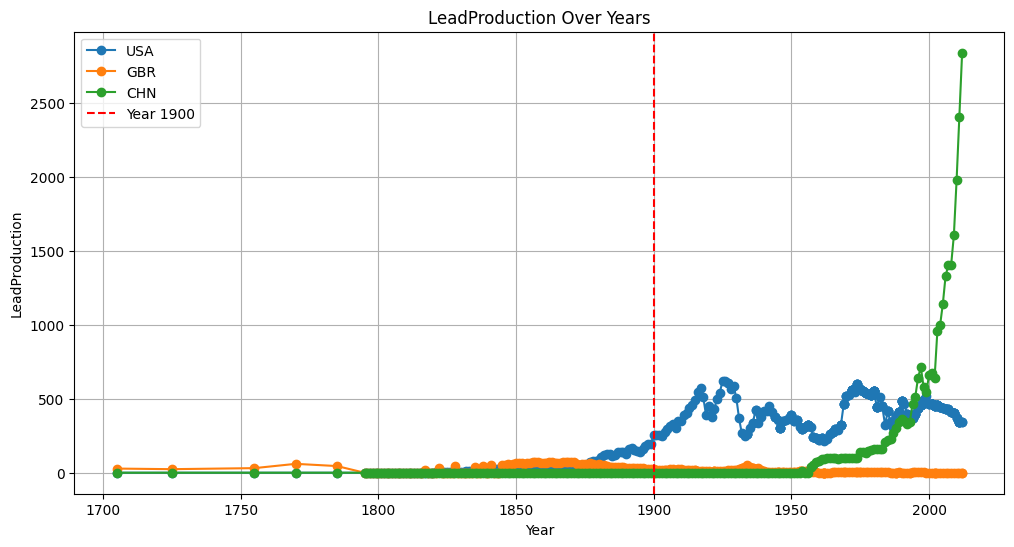

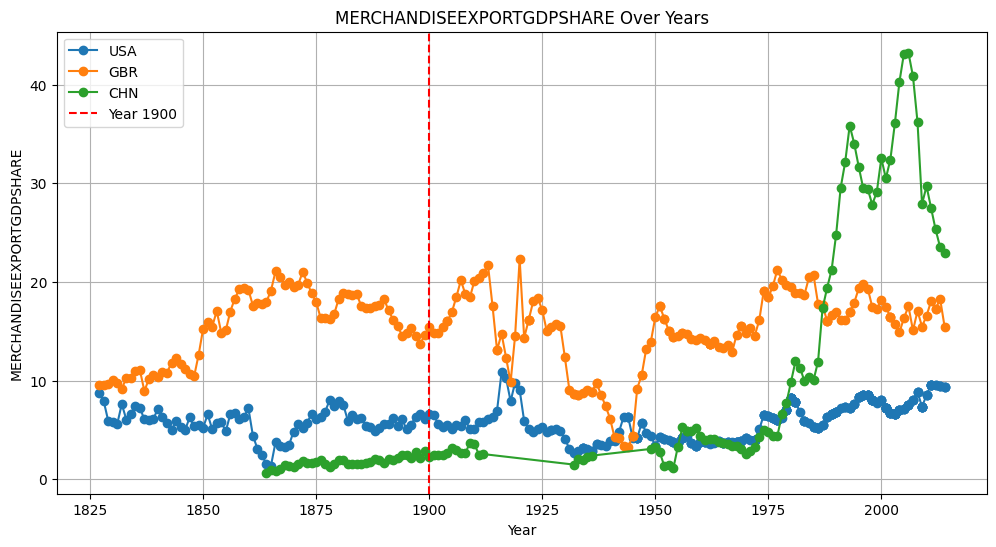

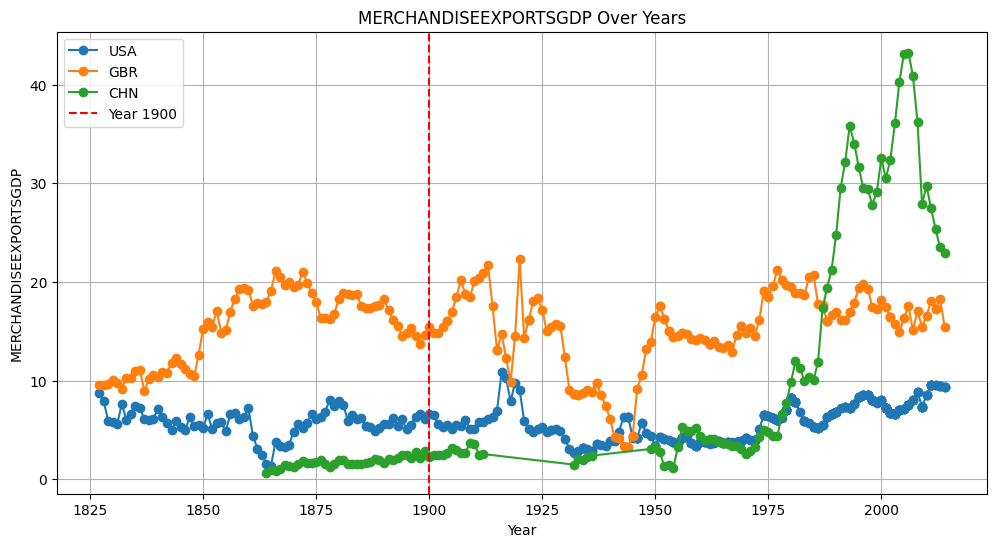

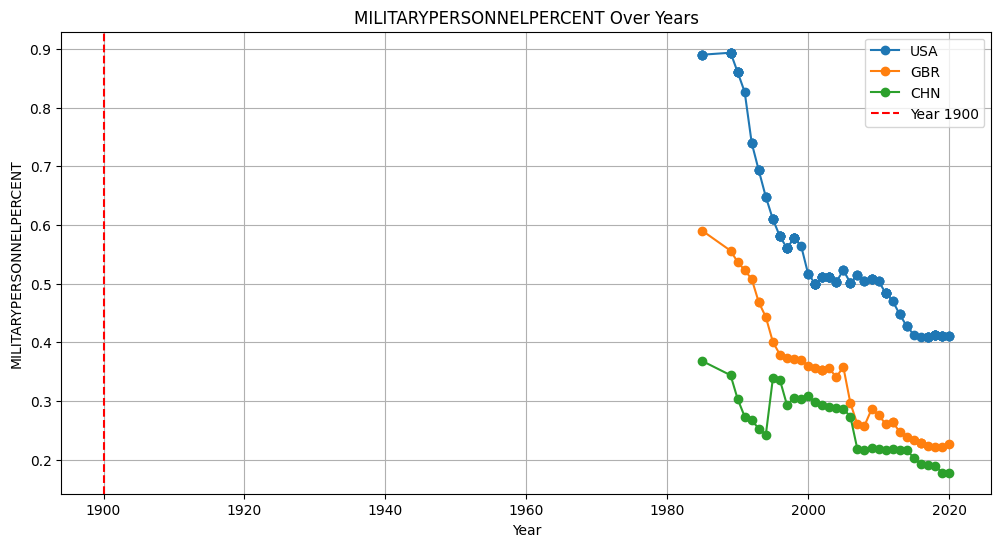

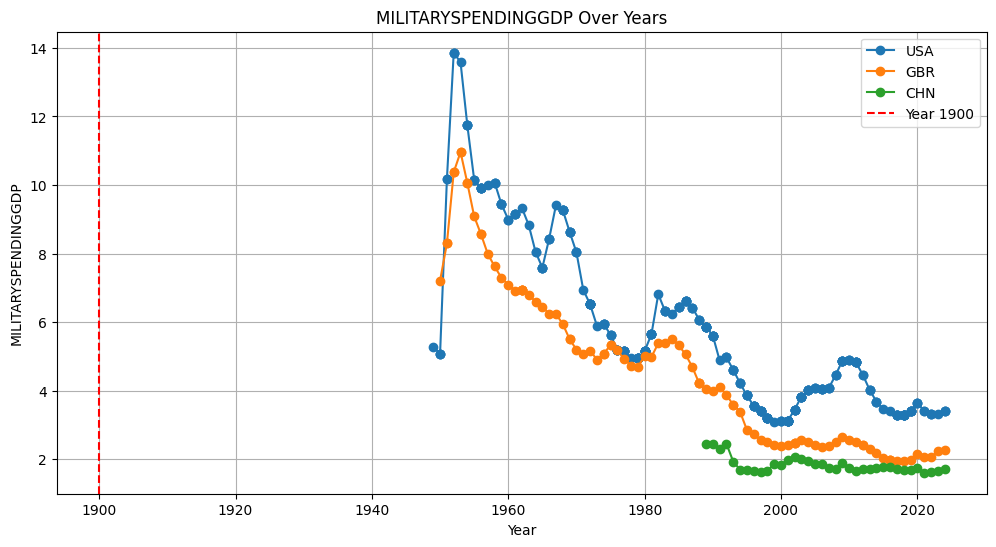

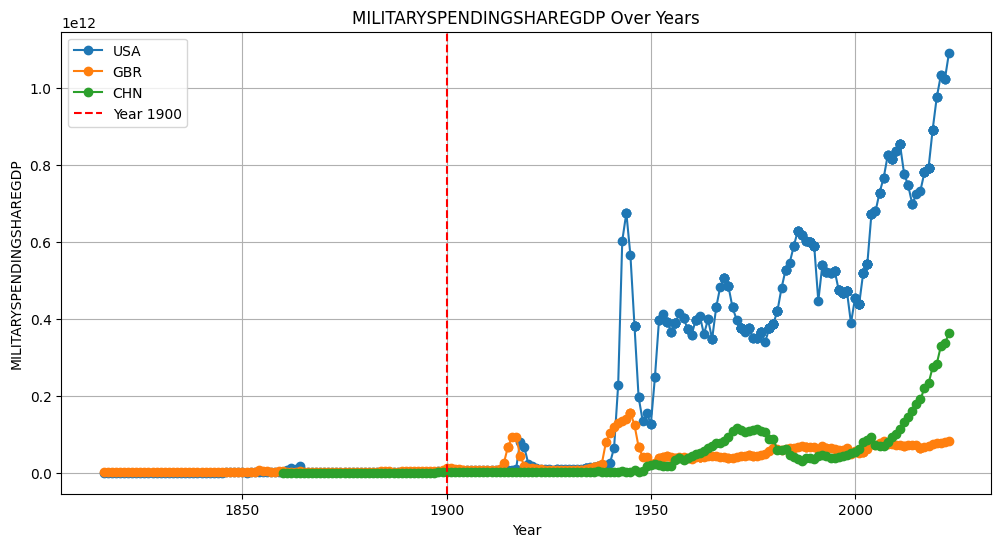

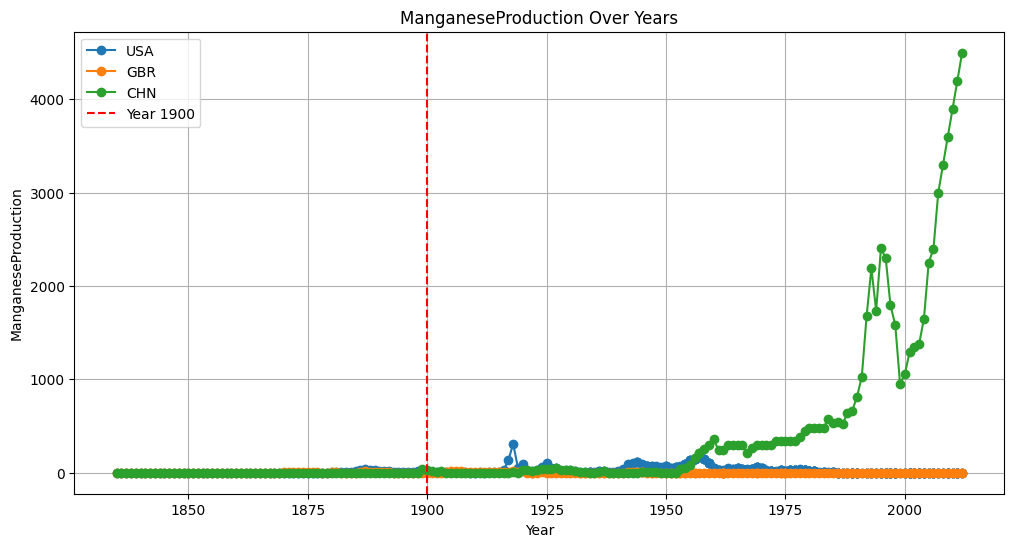

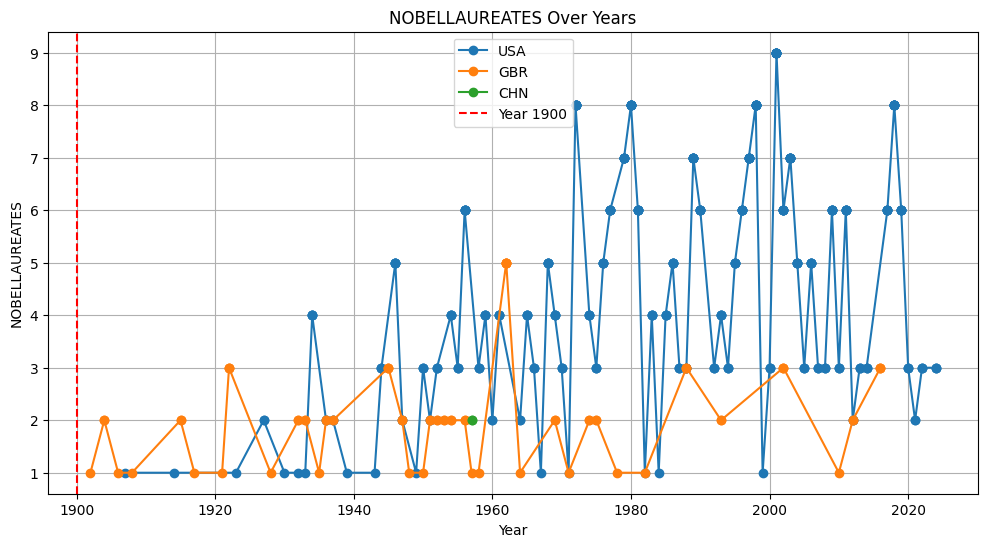

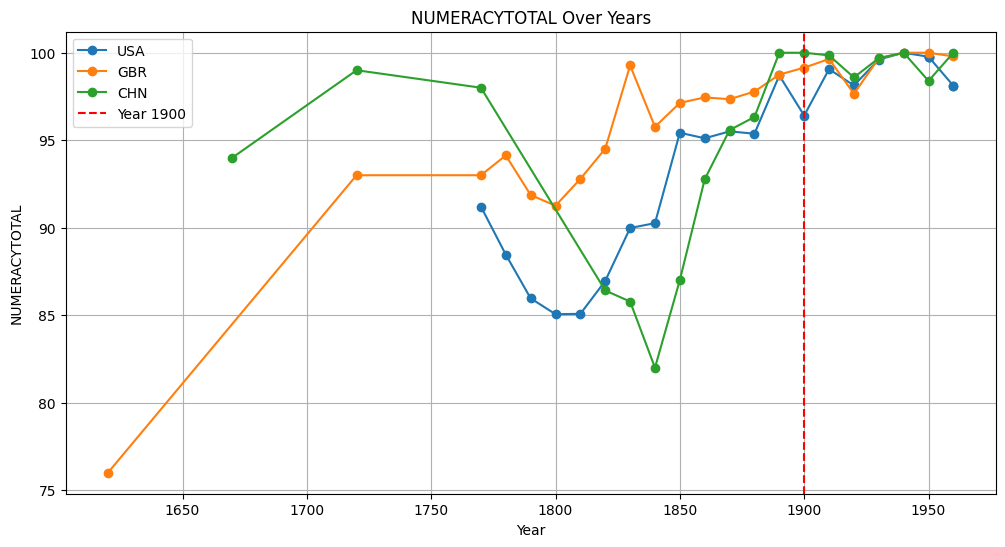

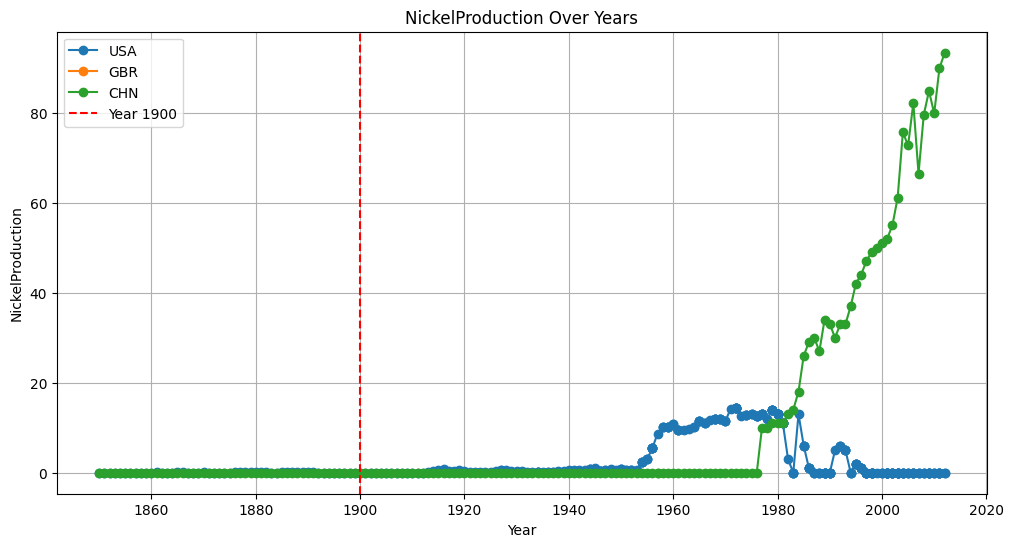

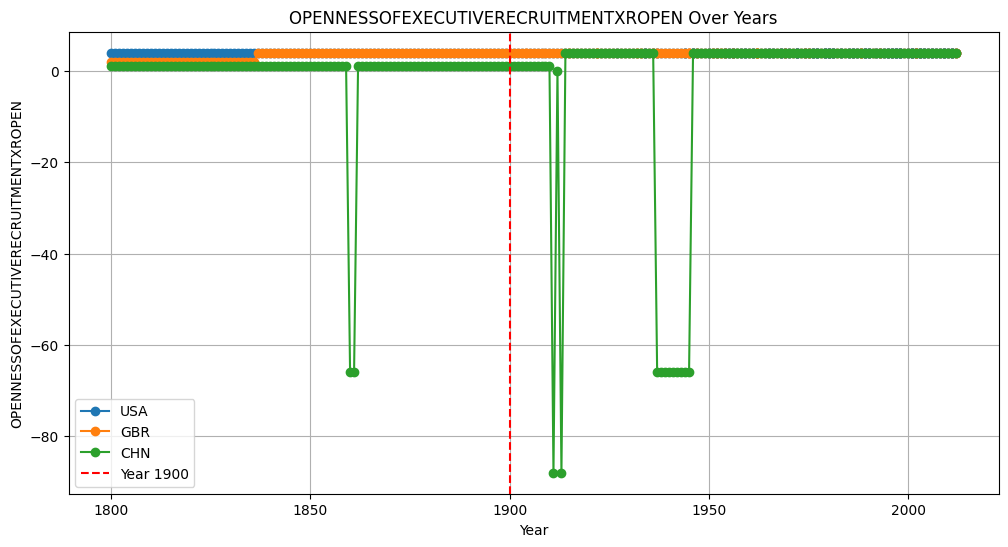

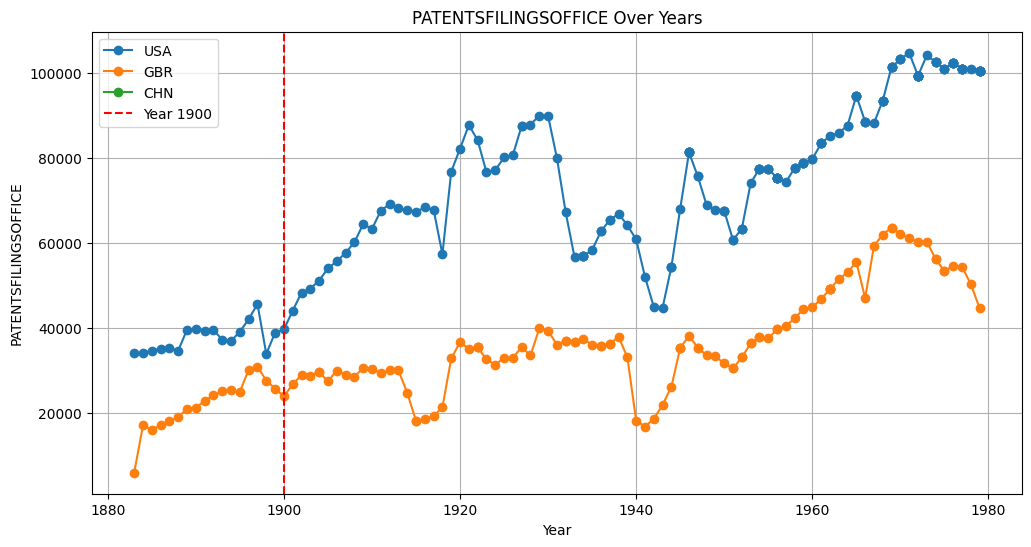

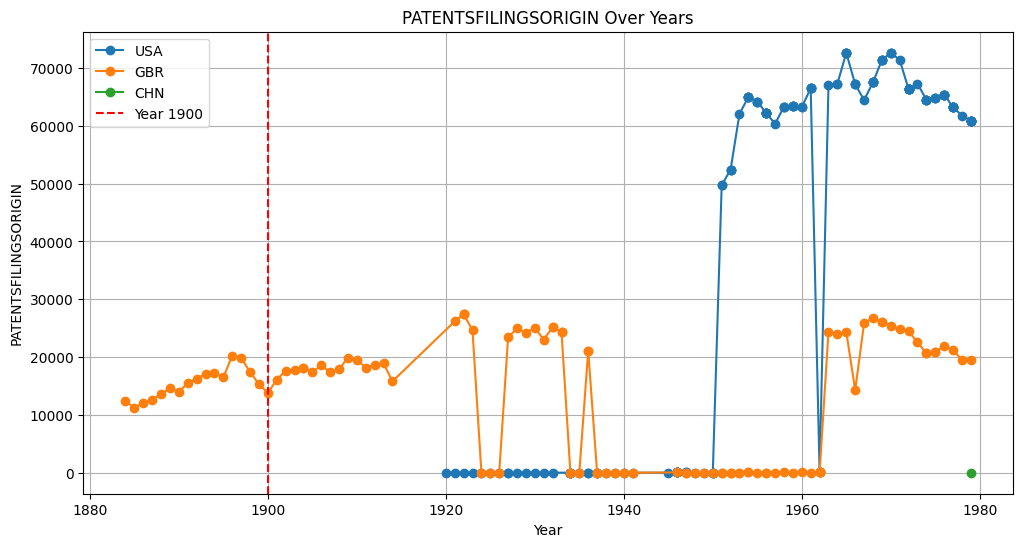

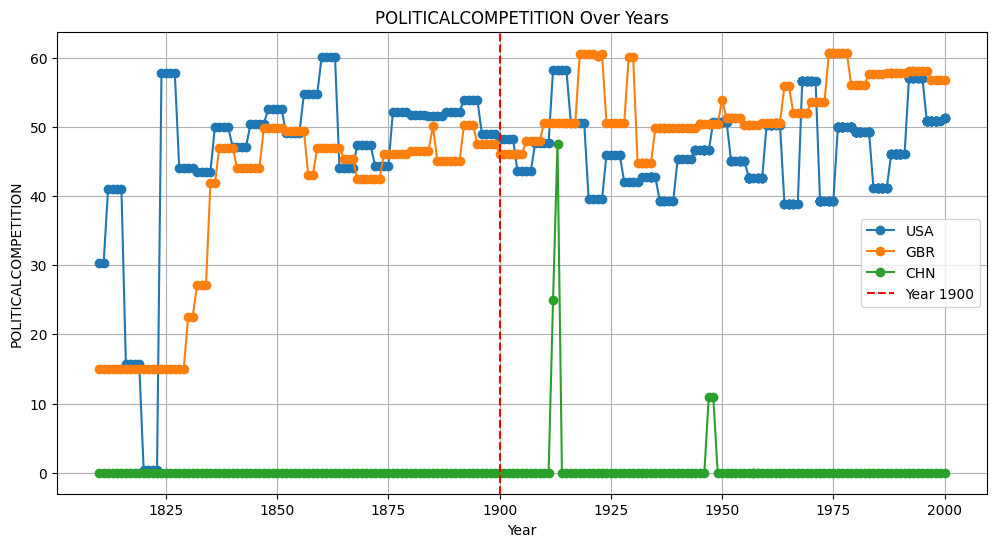

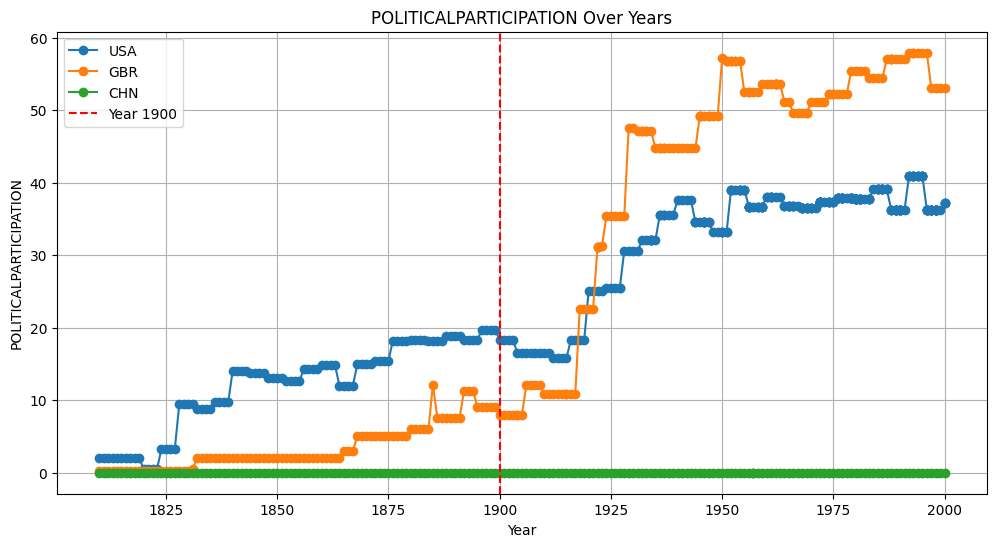

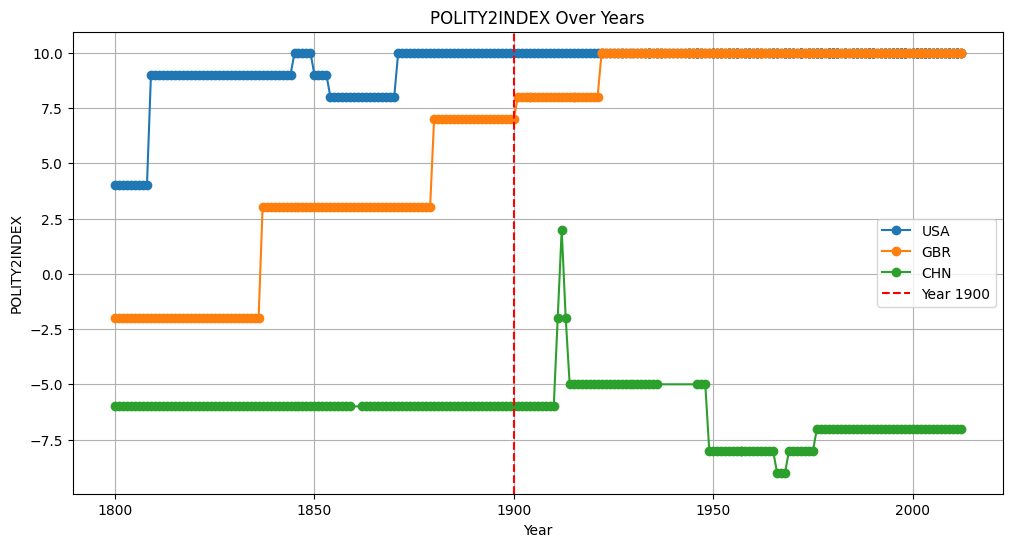

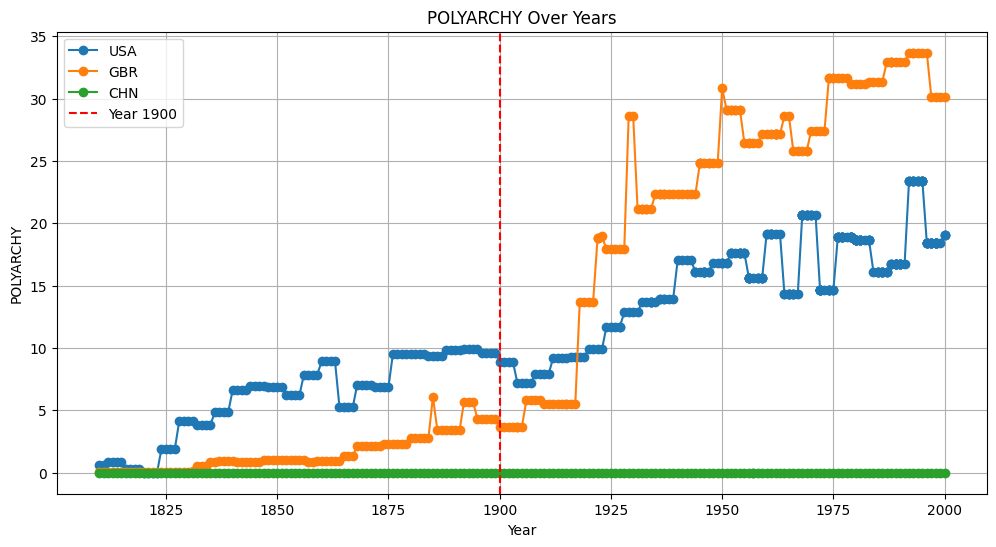

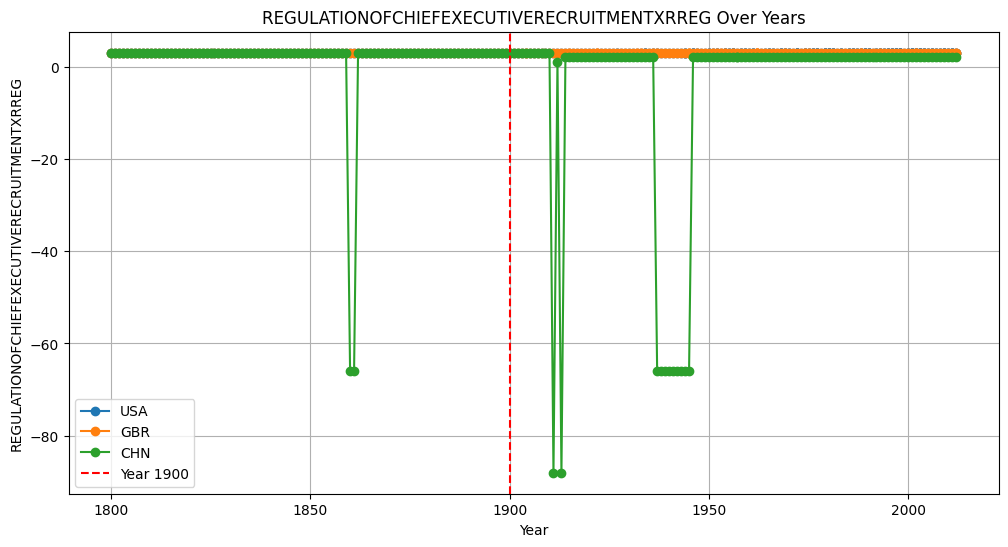

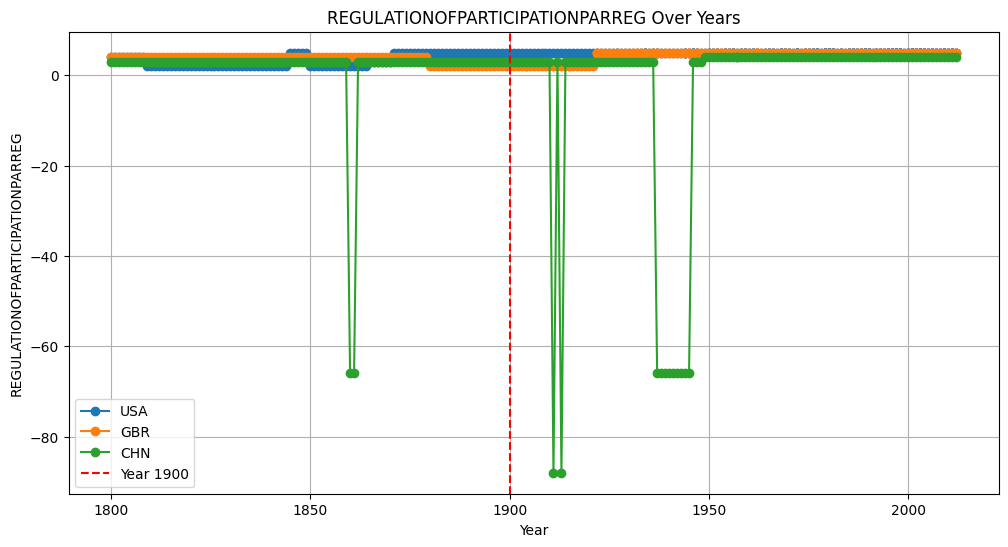

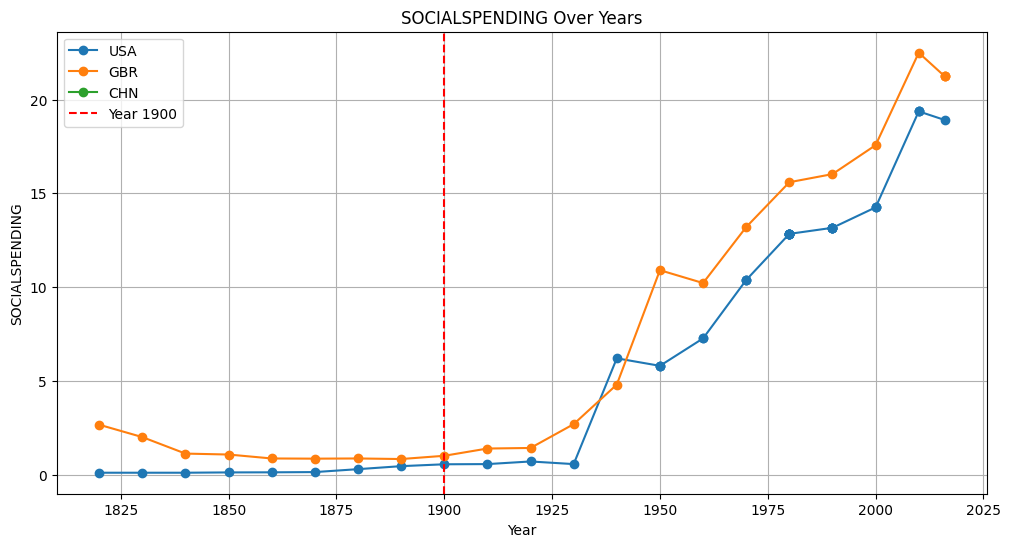

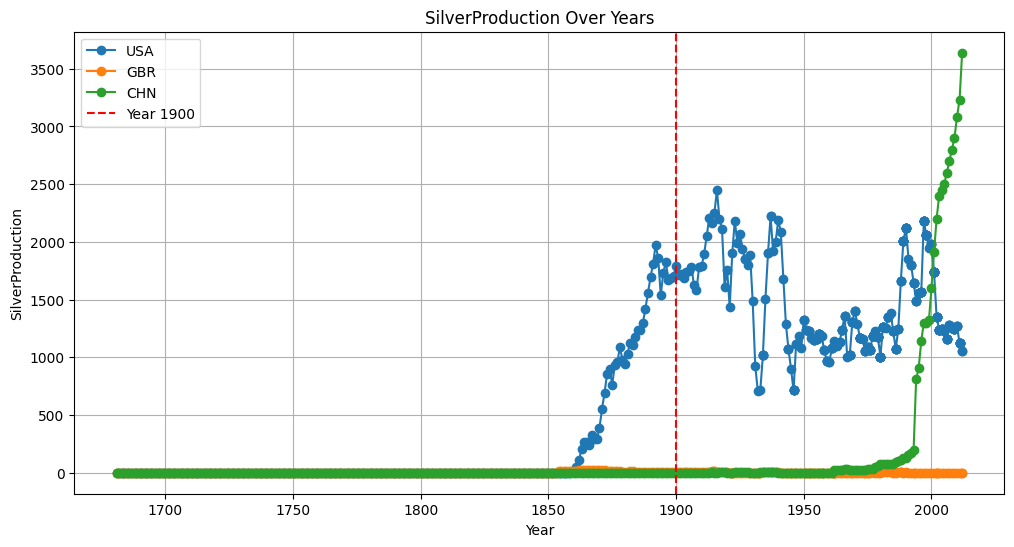

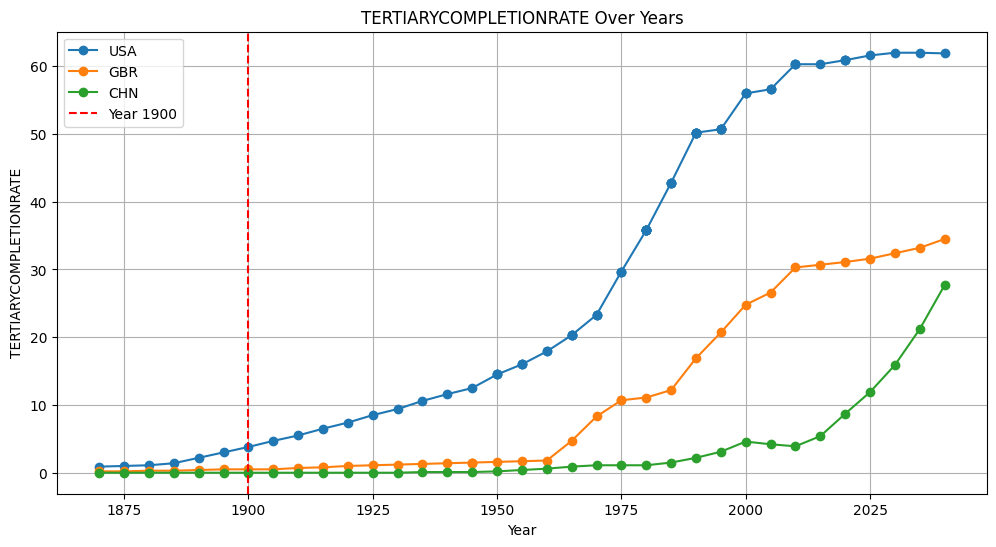

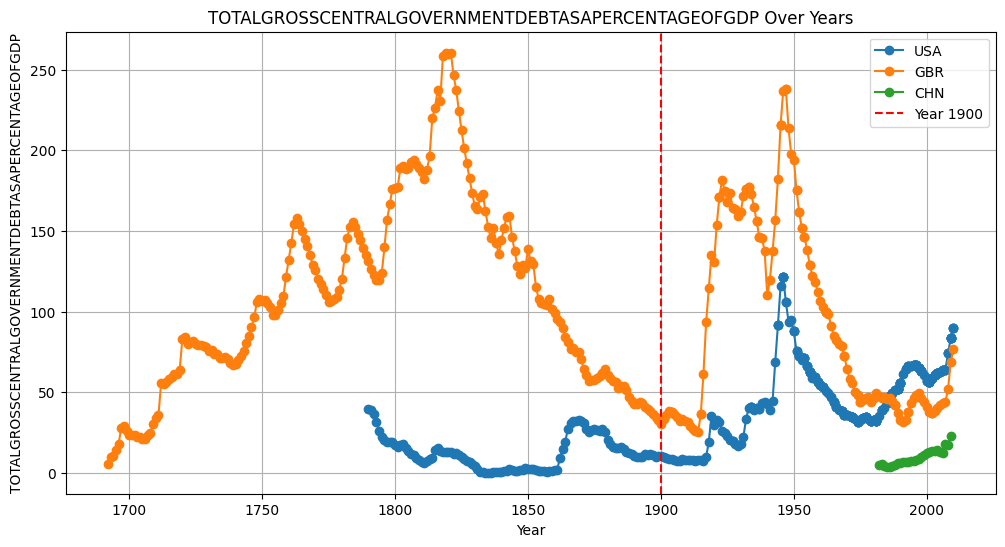

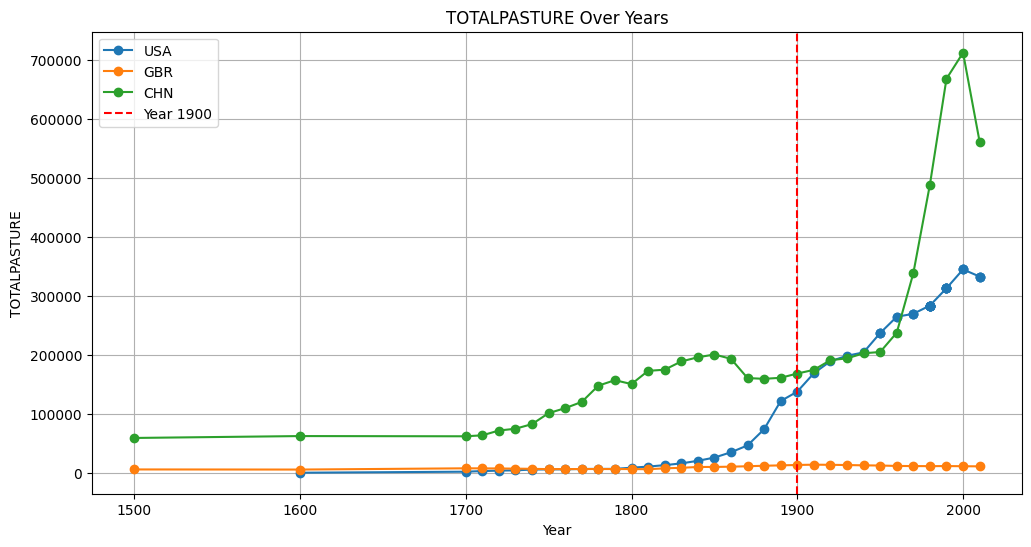

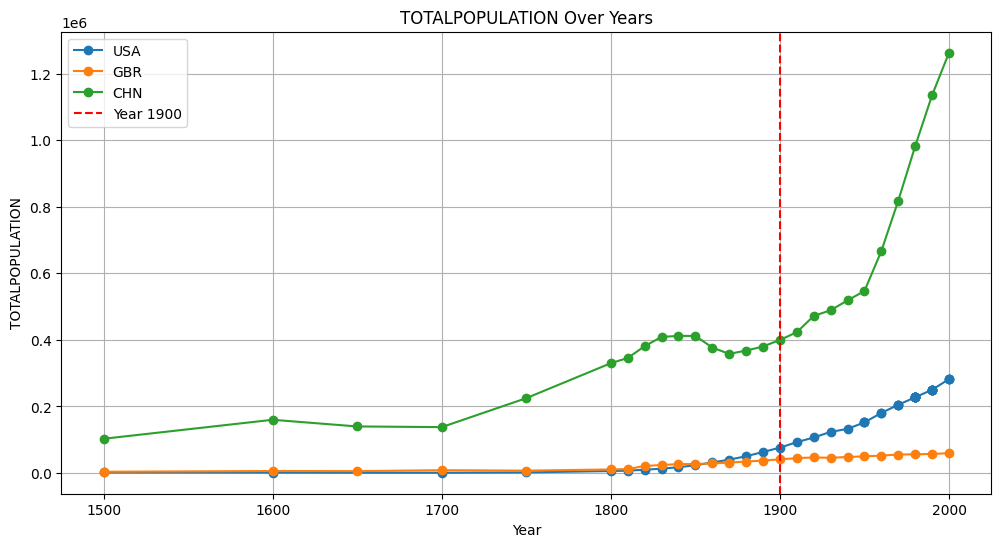

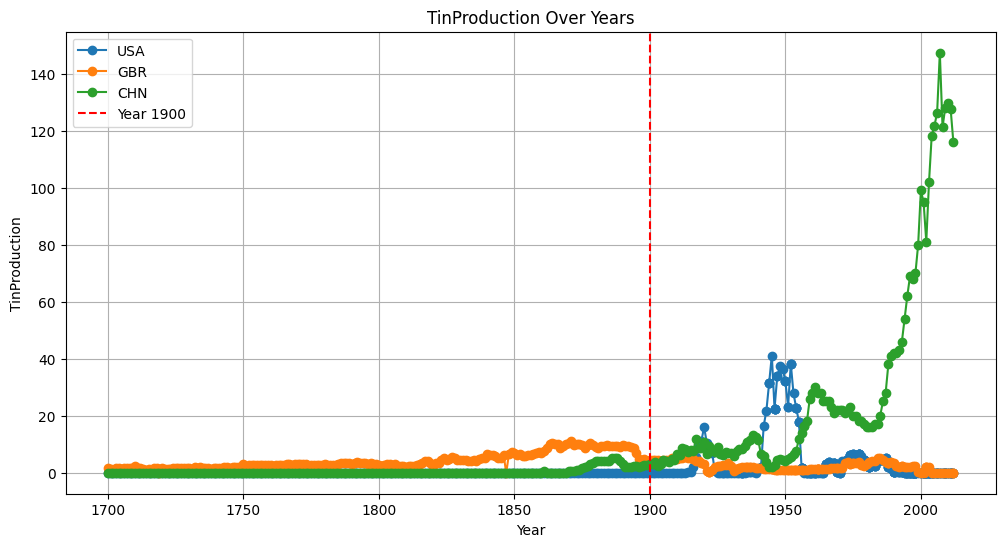

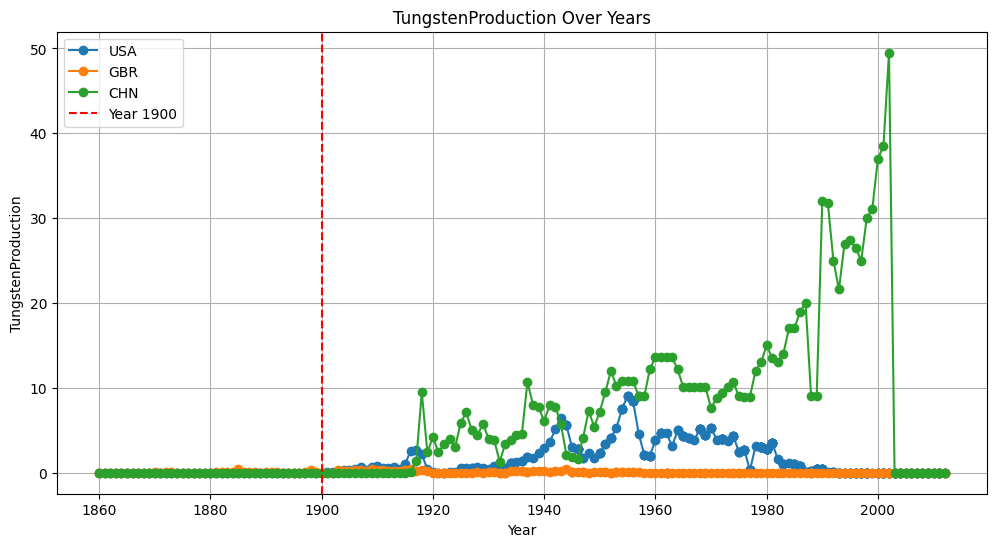

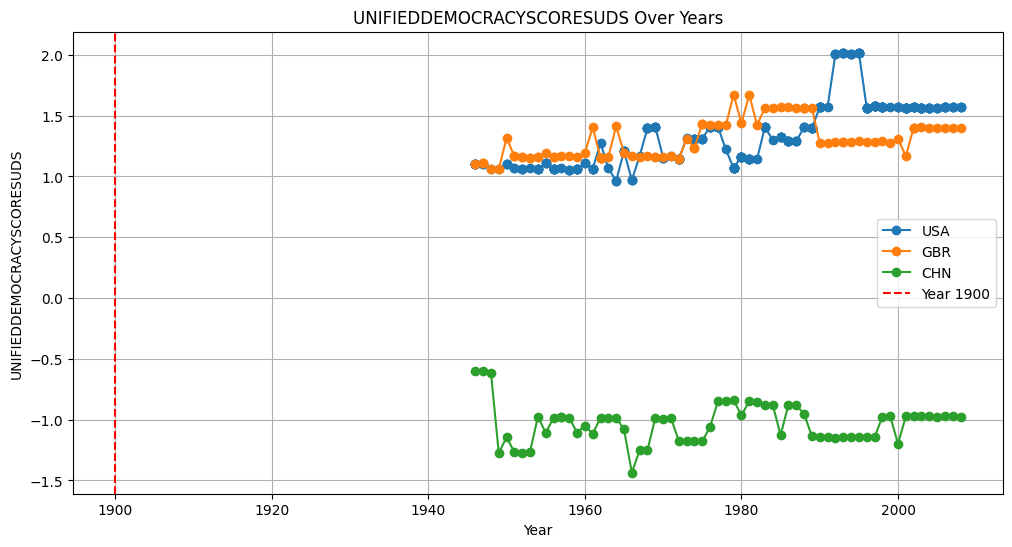

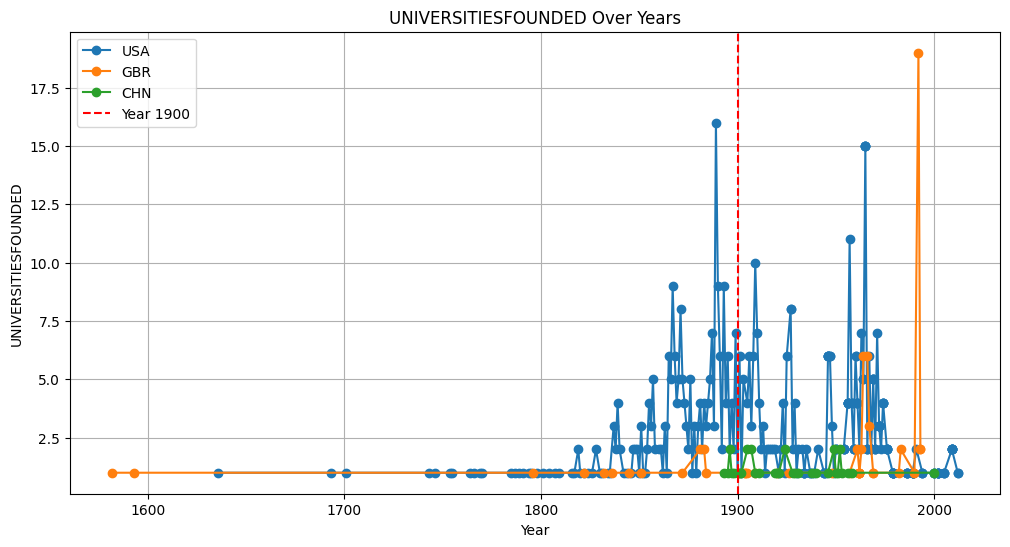

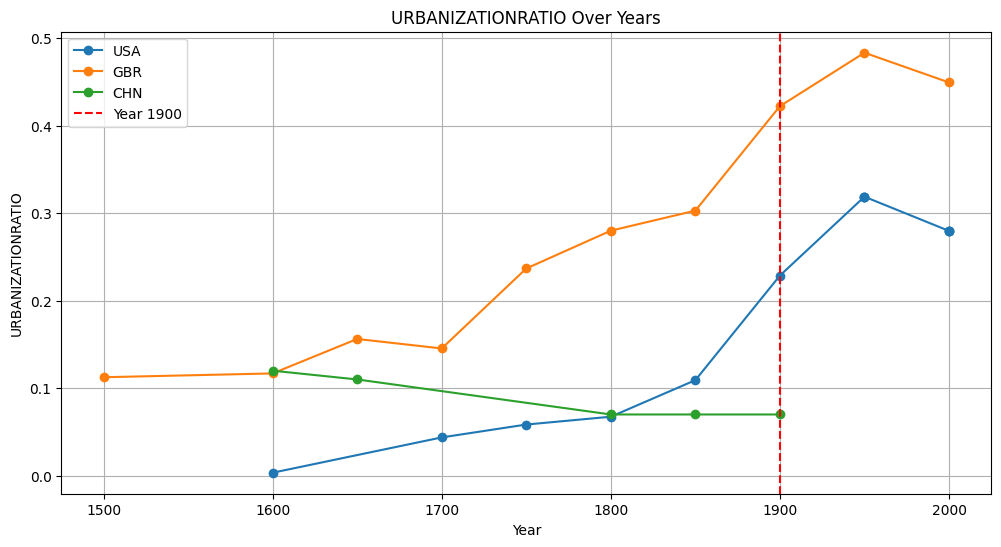

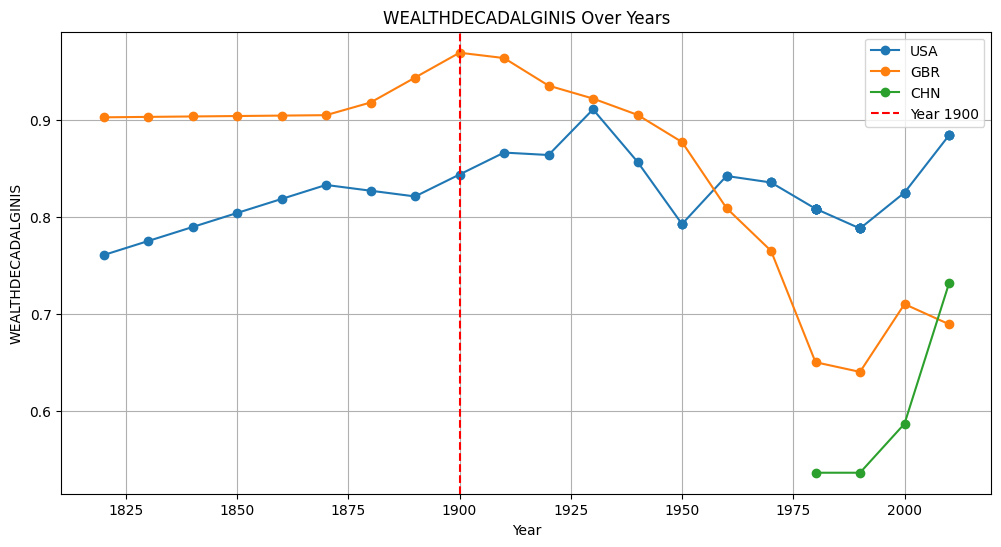

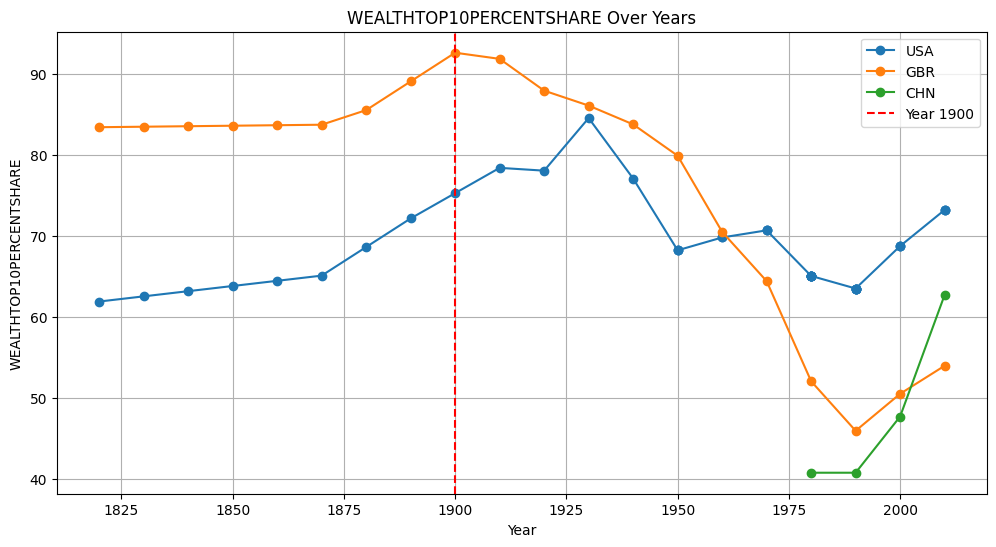

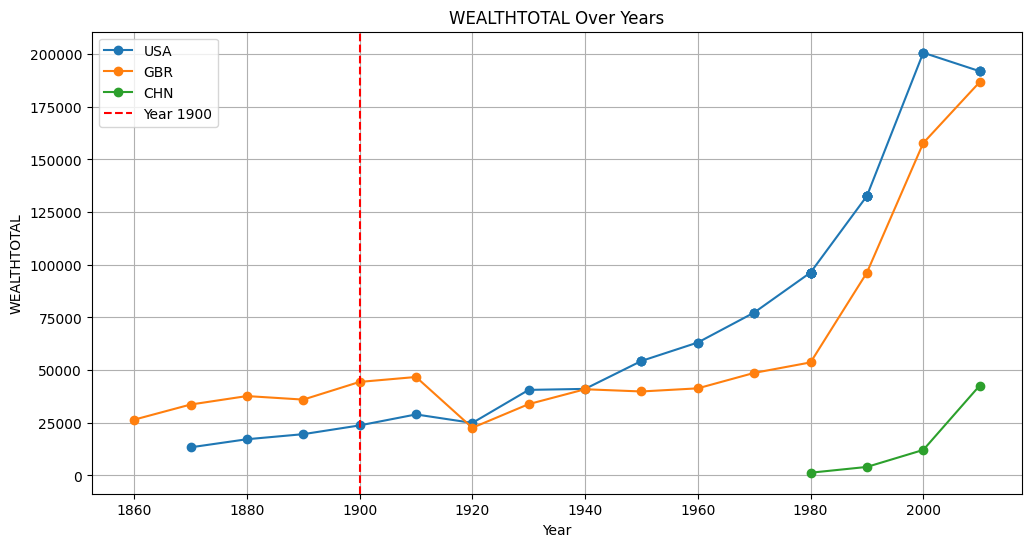

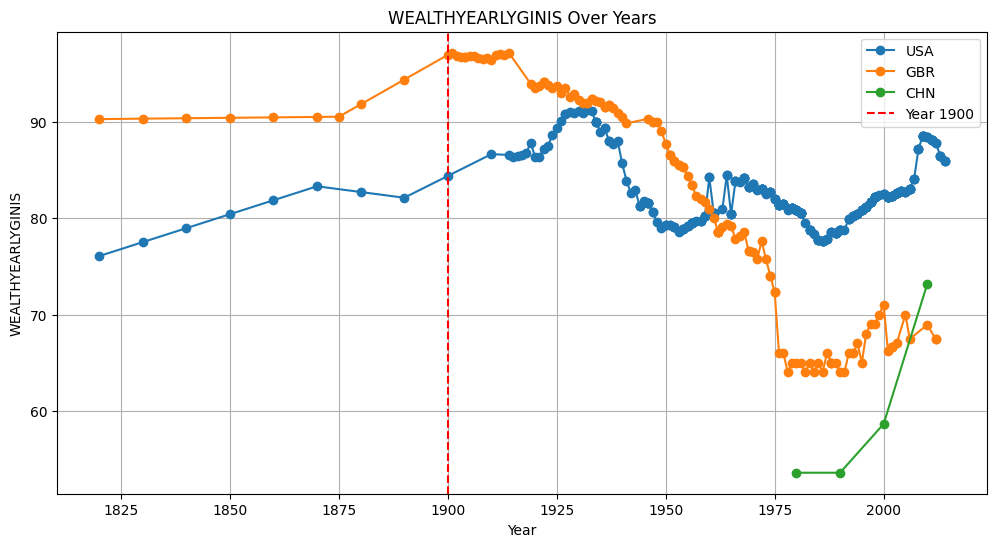

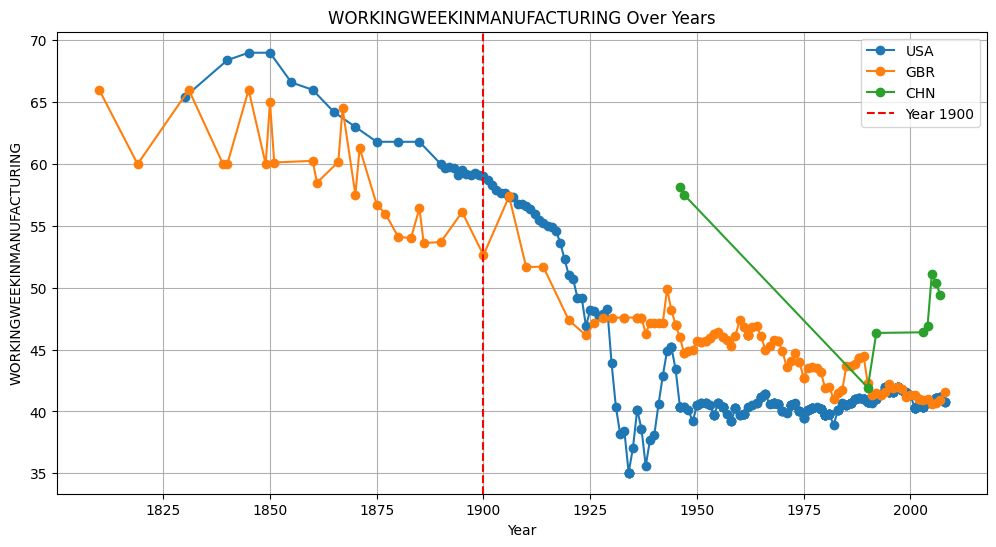

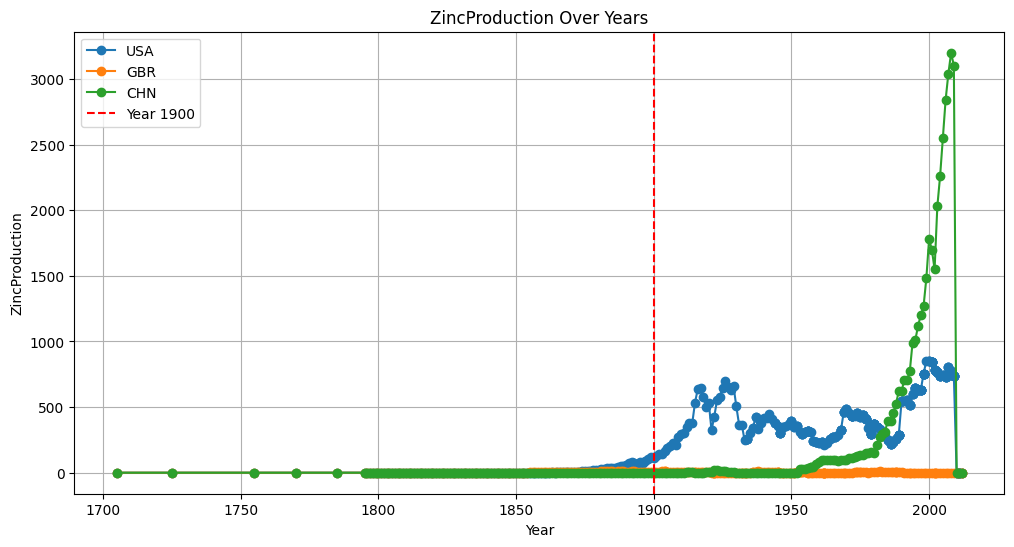

In [116]:
import matplotlib.pyplot as plt

for column in sorted(merged_df.columns):
    if column not in ['YEAR', 'COUNTRYCODE']:  # Exclude non-numeric columns
        plt.figure(figsize=(12, 6))
        for country in SELECTED_COUNTRIES:
            country_data = merged_df[merged_df['COUNTRYCODE'] == country].dropna(subset=[column])
            plt.plot(country_data['YEAR'], country_data[column], label=country, marker='o')
        plt.title(f'{column} Over Years')
        plt.xlabel('Year')
        plt.axvline(x=1900, color='red', linestyle='--', label='Year 1900')
        plt.ylabel(column)
        plt.legend()
        plt.grid()
        plt.show()
